In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools

# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols


#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Librerías para manejar fechas
from datetime import datetime
import calendar

# Desplegar todas las columnas
pd.options.display.max_columns = None

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df= pd.read_csv("datos/0.bikes.csv", index_col=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.set_index(["instant"], inplace= True)

In [4]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [5]:
654-3654

-3000

In [6]:
-3000/1560

-1.9230769230769231

## Renombrar columnas

In [7]:
cambio_columnas = {col :  col.lower().strip().replace(" ","_") for col in df.columns}

df.rename(columns = cambio_columnas, inplace=True)

df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

# Análisis exploratorio

#### - Shape

In [8]:
df.shape

(730, 15)

#### - Columnas

In [9]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

#### Info (columnas, tipo de datos y nulos)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 91.2+ KB


No hay nulos

#### - Describe: Principales estadísticos

In [11]:
# Descibe de columnas numéricas
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
mnth,730.0,7.0,3.0,1.0,4.0,7.0,10.0,12.0
holiday,730.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
weekday,730.0,3.0,2.0,0.0,1.0,3.0,5.0,6.0
workingday,730.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
weathersit,730.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0
temp,730.0,20.0,8.0,2.0,14.0,20.0,27.0,35.0
atemp,730.0,24.0,8.0,4.0,17.0,24.0,30.0,42.0
hum,730.0,63.0,14.0,0.0,52.0,63.0,73.0,97.0
windspeed,730.0,13.0,5.0,2.0,9.0,12.0,16.0,34.0


In [12]:
# Número de columnas numéricas
print(len(df.describe().T))

13


In [13]:
df.describe(include = "object").T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


### - Presencia de nulos

In [14]:
df.stb.missing()

,missing,total,percent
dteday,0,730,0.0
season,0,730,0.0
yr,0,730,0.0
mnth,0,730,0.0
holiday,0,730,0.0
weekday,0,730,0.0
workingday,0,730,0.0
weathersit,0,730,0.0
temp,0,730,0.0
atemp,0,730,0.0


### - Presencia de duplicados

In [15]:
df.duplicated().sum()

0

In [16]:
# No se detectan registros duplicados.
# En el caso de que se detectaran aplicar:
# df.drop_duplicates(inplace=True)

### -Columnas categóricas valores únicos


In [17]:
df_categoricas = df.select_dtypes(include="object")

# Creamos un Dataframe a partir de un diccionario.
# Creamos dos listas para meter el nombre de la variable y los valores unicos
variable = []
n_uniques = []
for col in df_categoricas.columns: # Iteramos por las columnas de DF categoricas y apendeamos los distintos valores
    variable.append(col)
    n_uniques.append(df_categoricas[col].unique())
datos = {"variable": variable, "n_uniques": n_uniques} # Creamos el diccionario
df_valoresunicos = pd.DataFrame.from_dict(datos)
df_valoresunicos


,variable,n_uniques
0,dteday,"[01-01-2018, 02-01-2018, 03-01-2018, 04-01-201..."
1,season,"[spring, summer, autumn, winter]"


Se identifica que existen dos variables categóricas, de las cuales habrá que convertir una a datetime y corroborar que la estación se corresponda con la fecha

### - Columnas encoding valores únicos

In [18]:
df_encoding = df[['holiday', 'weekday',
       'workingday', 'weathersit']]
df_encoding.head()

variable = []
n_uniques = []
for col in df_encoding.columns: # Iteramos por las columnas de DF categoricas y apendeamos los distintos valores
    variable.append(col)
    n_uniques.append(df_encoding[col].unique())
datos = {"variable": variable, "n_uniques": n_uniques} # Creamos el diccionario
df_unicosencoding = pd.DataFrame.from_dict(datos)
df_unicosencoding

,variable,n_uniques
0,holiday,"[0, 1]"
1,weekday,"[6, 0, 1, 2, 3, 4, 5]"
2,workingday,"[0, 1]"
3,weathersit,"[2, 1, 3]"


In [19]:
df_encoding.dtypes

holiday       int64
weekday       int64
workingday    int64
weathersit    int64
dtype: object

Adicionalmente, se observa que hay varias columnas que tienen encoding, se procederá a corrobar que los valores sean los correctos.

# Limpieza Columnas

#### - Type columna dteday

In [20]:
# Cambiamos el tipo de dato de la columa dtday
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)

#### - Limpieza columna season

No se corresponden los meses con las estaciones del año

In [21]:
seasons= pd.crosstab(df['season'],df['mnth'] , margins=False)
seasons

mnth,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
autumn,0,0,0,0,0,20,62,62,44,0,0,0
spring,62,56,40,0,0,0,0,0,0,0,0,22
summer,0,0,22,60,62,40,0,0,0,0,0,0
winter,0,0,0,0,0,0,0,0,16,62,60,40


In [22]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [23]:
df.insert(2,"seasons", df['dteday'].map(season_of_date) )

In [24]:
season2 = pd.crosstab(df['seasons'],df['mnth'] , margins=False)
season2

mnth,1,2,3,4,5,6,7,8,9,10,11,12
seasons,,,,,,,,,,,,
autumn,0,0,0,0,0,0,0,0,16,62,60,40
spring,0,0,22,60,62,40,0,0,0,0,0,0
summer,0,0,0,0,0,20,62,62,44,0,0,0
winter,62,56,40,0,0,0,0,0,0,0,0,22


In [25]:
df.head(2)

,dteday,season,seasons,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2018-01-01,spring,winter,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,spring,winter,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [26]:
# Eliminamos la columnas season con las estaciones erróneas
df.drop(columns=["season"], axis=1, inplace=True)

#### -Limpieza columna weekday, días de la semana

In [27]:
# Función para obtener el número de día, según la fecha
    # Codificado 0-monday, 1-tuesday, hasta 6-sunday
def dia_semana_num(dia):
    return dia.weekday()

In [28]:
df.insert(6,"weekday_num", df["dteday"].apply(dia_semana_num) )

In [29]:
# Función para obtener el nombre del día

def dia_semana_cat(dia):
    
    if dia == 0:
        return "monday"
    elif dia == 1:
        return "tuesday"
    elif dia == 2:
        return "wednesday"
    elif dia == 3:
        return "thursday"
    elif dia == 4:
        return "friday"
    elif dia == 5:
        return "saturday"
    else:
        return "sunday"

In [30]:
df.insert(7,"weekday_cat", df["weekday_num"].apply(dia_semana_cat) )

In [31]:
df.head(2)

,dteday,seasons,yr,mnth,holiday,weekday,weekday_num,weekday_cat,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,0,6,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,winter,0,1,0,0,1,tuesday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [32]:
#Quitamos la columna "weekday"
df.drop(columns=['weekday'], axis = 1, inplace=True)

### - Creación columna workingday correcta

In [33]:
def workingday_num(dia):
    # Función que devuelve 0 si es sábado, domingo o festivo. 1 en lo contrario
    
    # Diccionario de festivos
    festivos = {'01-01': 'New Years Day', 
        '16-01': 'Martin Luther King’s Birthday', 
        '13-02': 'Lincolns Birthday', 
        '20-02': 'President’s Day', 
        '31-03': 'Cesar Chavez’ Birthday', 
        '29-05': 'Memorial Day', 
        '04-07': 'Independence Day', 
        '05-07': 'Bloody Thursday', 
        '28-07': 'Harry Bridges’ Birthday', 
        '04-09': 'Labor Day', 
        '10-11': 'Veterans’ Day', 
        '23-11': 'Thanksgiving Day', 
        '24-11': 'Day After Thanksgiving', 
        '24-12': 'Christmas Eve', 
        '25-12': 'Christmas Day', 
        '31-12': 'New Year’s Eve'}
    
    # Si es fin de semana
    if (dia.weekday() == 5) or (dia.weekday() == 6):
        return 0
    else:
        # Si es festivo
        dia_festivo = datetime.strftime(dia, '%d-%m')
        if dia_festivo in festivos.keys():
            return 0
        else:
            # Si es día laborable
            return 1

In [34]:
df.insert(8, "workingday_num", df["dteday"].apply(workingday_num))

In [35]:
df.head(3)

,dteday,seasons,yr,mnth,holiday,weekday_num,weekday_cat,workingday,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,0,0,monday,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,winter,0,1,0,1,tuesday,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,winter,0,1,0,2,wednesday,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [36]:
#Quitamos la columna workingday
df.drop(columns=['workingday'], axis = 1, inplace=True)

### - Creación columna holiday correcta

In [37]:
def holday_real(dia):
    # Función que devuelve 0 festivo. 1 en lo contrario
    
    # Diccionario de festivos
    festivos = {'01-01': 'New Years Day', 
        '16-01': 'Martin Luther King’s Birthday', 
        '13-02': 'Lincolns Birthday', 
        '20-02': 'President’s Day', 
        '31-03': 'Cesar Chavez’ Birthday', 
        '29-05': 'Memorial Day', 
        '04-07': 'Independence Day', 
        '05-07': 'Bloody Thursday', 
        '28-07': 'Harry Bridges’ Birthday', 
        '04-09': 'Labor Day', 
        '10-11': 'Veterans’ Day', 
        '23-11': 'Thanksgiving Day', 
        '24-11': 'Day After Thanksgiving', 
        '24-12': 'Christmas Eve', 
        '25-12': 'Christmas Day', 
        '31-12': 'New Year’s Eve'}
    
    # Si es fin de semana
    dia_festivo = datetime.strftime(dia, '%d-%m')
    if dia_festivo in festivos.keys():
        return 1
    else:
        # Si es día laborable
        return 0

In [38]:
df.insert(4, "holiday_num", df["dteday"].apply(holday_real))

In [39]:
festivos = pd.crosstab(df['holiday_num'],df['dteday'] , margins=False)
festivos

dteday,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,2018-01-11,2018-01-12,2018-01-13,2018-01-14,2018-01-15,2018-01-16,2018-01-17,2018-01-18,2018-01-19,2018-01-20,2018-01-21,2018-01-22,2018-01-23,2018-01-24,2018-01-25,2018-01-26,2018-01-27,2018-01-28,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-03,2018-02-04,2018-02-05,2018-02-06,2018-02-07,2018-02-08,2018-02-09,2018-02-10,2018-02-11,2018-02-12,2018-02-13,2018-02-14,2018-02-15,2018-02-16,2018-02-17,2018-02-18,2018-02-19,2018-02-20,2018-02-21,2018-02-22,2018-02-23,2018-02-24,2018-02-25,2018-02-26,2018-02-27,2018-02-28,2018-03-01,2018-03-02,2018-03-03,2018-03-04,2018-03-05,2018-03-06,2018-03-07,2018-03-08,2018-03-09,2018-03-10,2018-03-11,2018-03-12,2018-03-13,2018-03-14,2018-03-15,2018-03-16,2018-03-17,2018-03-18,2018-03-19,2018-03-20,2018-03-21,2018-03-22,2018-03-23,2018-03-24,2018-03-25,2018-03-26,2018-03-27,2018-03-28,2018-03-29,2018-03-30,2018-03-31,2018-04-01,2018-04-02,2018-04-03,2018-04-04,2018-04-05,2018-04-06,2018-04-07,2018-04-08,2018-04-09,2018-04-10,2018-04-11,2018-04-12,2018-04-13,2018-04-14,2018-04-15,2018-04-16,2018-04-17,2018-04-18,2018-04-19,2018-04-20,2018-04-21,2018-04-22,2018-04-23,2018-04-24,2018-04-25,2018-04-26,2018-04-27,2018-04-28,2018-04-29,2018-04-30,2018-05-01,2018-05-02,2018-05-03,2018-05-04,2018-05-05,2018-05-06,2018-05-07,2018-05-08,2018-05-09,2018-05-10,2018-05-11,2018-05-12,2018-05-13,2018-05-14,2018-05-15,2018-05-16,2018-05-17,2018-05-18,2018-05-19,2018-05-20,2018-05-21,2018-05-22,2018-05-23,2018-05-24,2018-05-25,2018-05-26,2018-05-27,2018-05-28,2018-05-29,2018-05-30,2018-05-31,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10,2018-06-11,2018-06-12,2018-06-13,2018-06-14,2018-06-15,2018-06-16,2018-06-17,2018-06-18,2018-06-19,2018-06-20,2018-06-21,2018-06-22,2018-06-23,2018-06-24,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30,2018-07-01,2018-07-02,2018-07-03,2018-07-04,2018-07-05,2018-07-06,2018-07-07,2018-07-08,2018-07-09,2018-07-10,2018-07-11,2018-07-12,2018-07-13,2018-07-14,2018-07-15,2018-07-16,2018-07-17,2018-07-18,2018-07-19,2018-07-20,2018-07-21,2018-07-22,2018-07-23,2018-07-24,2018-07-25,2018-07-26,2018-07-27,2018-07-28,2018-07-29,2018-07-30,2018-07-31,2018-08-01,2018-08-02,2018-08-03,2018-08-04,2018-08-05,2018-08-06,2018-08-07,2018-08-08,2018-08-09,2018-08-10,2018-08-11,2018-08-12,2018-08-13,2018-08-14,2018-08-15,2018-08-16,2018-08-17,2018-08-18,2018-08-19,2018-08-20,2018-08-21,2018-08-22,2018-08-23,2018-08-24,2018-08-25,2018-08-26,2018-08-27,2018-08-28,2018-08-29,2018-08-30,2018-08-31,2018-09-01,2018-09-02,2018-09-03,2018-09-04,2018-09-05,2018-09-06,2018-09-07,2018-09-08,2018-09-09,2018-09-10,2018-09-11,2018-09-12,2018-09-13,2018-09-14,2018-09-15,2018-09-16,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21,2018-09-22,2018-09-23,2018-09-24,2018-09-25,2018-09-26,2018-09-27,2018-09-28,2018-09-29,2018-09-30,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07,2018-10-08,2018-10-09,2018-10-10,2018-10-11,2018-10-12,2018-10-13,2018-10-14,2018-10-15,2018-10-16,2018-10-17,2018-10-18,2018-10-19,2018-10-20,2018-10-21,2018-10-22,2018-10-23,2018-10-24,2018-10-25,2018-10-26,2018-10-27,2018-10-28,2018-10-29,2018-10-30,2018-10-31,2018-11-01,2018-11-02,2018-11-03,2018-11-04,2018-11-05,2018-11-06,2018-11-07,2018-11-08,2018-11-09,2018-11-10,2018-11-11,2018-11-12,2018-11-13,2018-11-14,2018-11-15,2018-11-16,2018-11-17,2018-11-18,2018-11-19,2018-11-20,2018-11-21,2018-11-22,2018-11-23,2018-11-24,2018-11-25,2018-11-26,2018-11-27,2018-11-28,2018-11-29,2018-11-30,2018-12-01,2018-12-02,2018-12-03,2018-12-04,2018-12-05,2018-12-06,2018-12-07,2018-12-08,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-14,2018-12-15,2018-12-16,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29,

In [40]:
#Quitamos la columna holiday
df.drop(columns=['holiday'], axis = 1, inplace=True)

In [41]:
df.sample(5)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
502,2019-05-17,spring,1,5,0,4,friday,1,1,24.326653,28.63065,52.0000,15.374825,1242,6142,7384
313,2018-11-09,autumn,0,11,0,4,friday,1,1,16.400000,20.45395,75.8333,4.167119,305,3804,4109
125,2018-05-05,spring,0,5,0,5,saturday,0,1,18.825847,22.09585,44.4167,19.791264,614,3819,4433
556,2019-07-10,summer,1,7,0,2,wednesday,1,2,29.554153,33.23980,66.7500,10.166379,954,5336,6290
486,2019-05-01,spring,1,5,0,2,wednesday,1,2,25.146653,28.85105,65.9583,10.458432,653,5087,5740


# Tipo de datos

In [42]:
# Identificamos el tipo de dato de las columnas, para conocer si se corresponden con la información que proporcionan
df.dtypes

dteday            datetime64[ns]
seasons                   object
yr                         int64
mnth                       int64
holiday_num                int64
weekday_num                int64
weekday_cat               object
workingday_num             int64
weathersit                 int64
temp                     float64
atemp                    float64
hum                      float64
windspeed                float64
casual                     int64
registered                 int64
cnt                        int64
dtype: object

In [43]:
# Convertimos a categóricas las columnsa que corresponden
columnas_categoria = ['seasons', 'yr', 'mnth', 'holiday_num', 'weekday_num',
       'weekday_cat', 'workingday_num', 'weathersit']

for i in columnas_categoria:
    df[i] = df[i].astype("category")

In [44]:
# Verificamos la transformación
df.dtypes

dteday            datetime64[ns]
seasons                 category
yr                      category
mnth                    category
holiday_num             category
weekday_num             category
weekday_cat             category
workingday_num          category
weathersit              category
temp                     float64
atemp                    float64
hum                      float64
windspeed                float64
casual                     int64
registered                 int64
cnt                        int64
dtype: object

# Outliers

In [45]:
# Creamos un listado con las columnas numéricas
numericas = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
numericas.head(2)

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
1,14.110847,18.18125,80.5833,10.749882,331,654,985
2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [46]:
# nos creamos una lista con las numericas no codificadas, ni años
lista_numericas = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

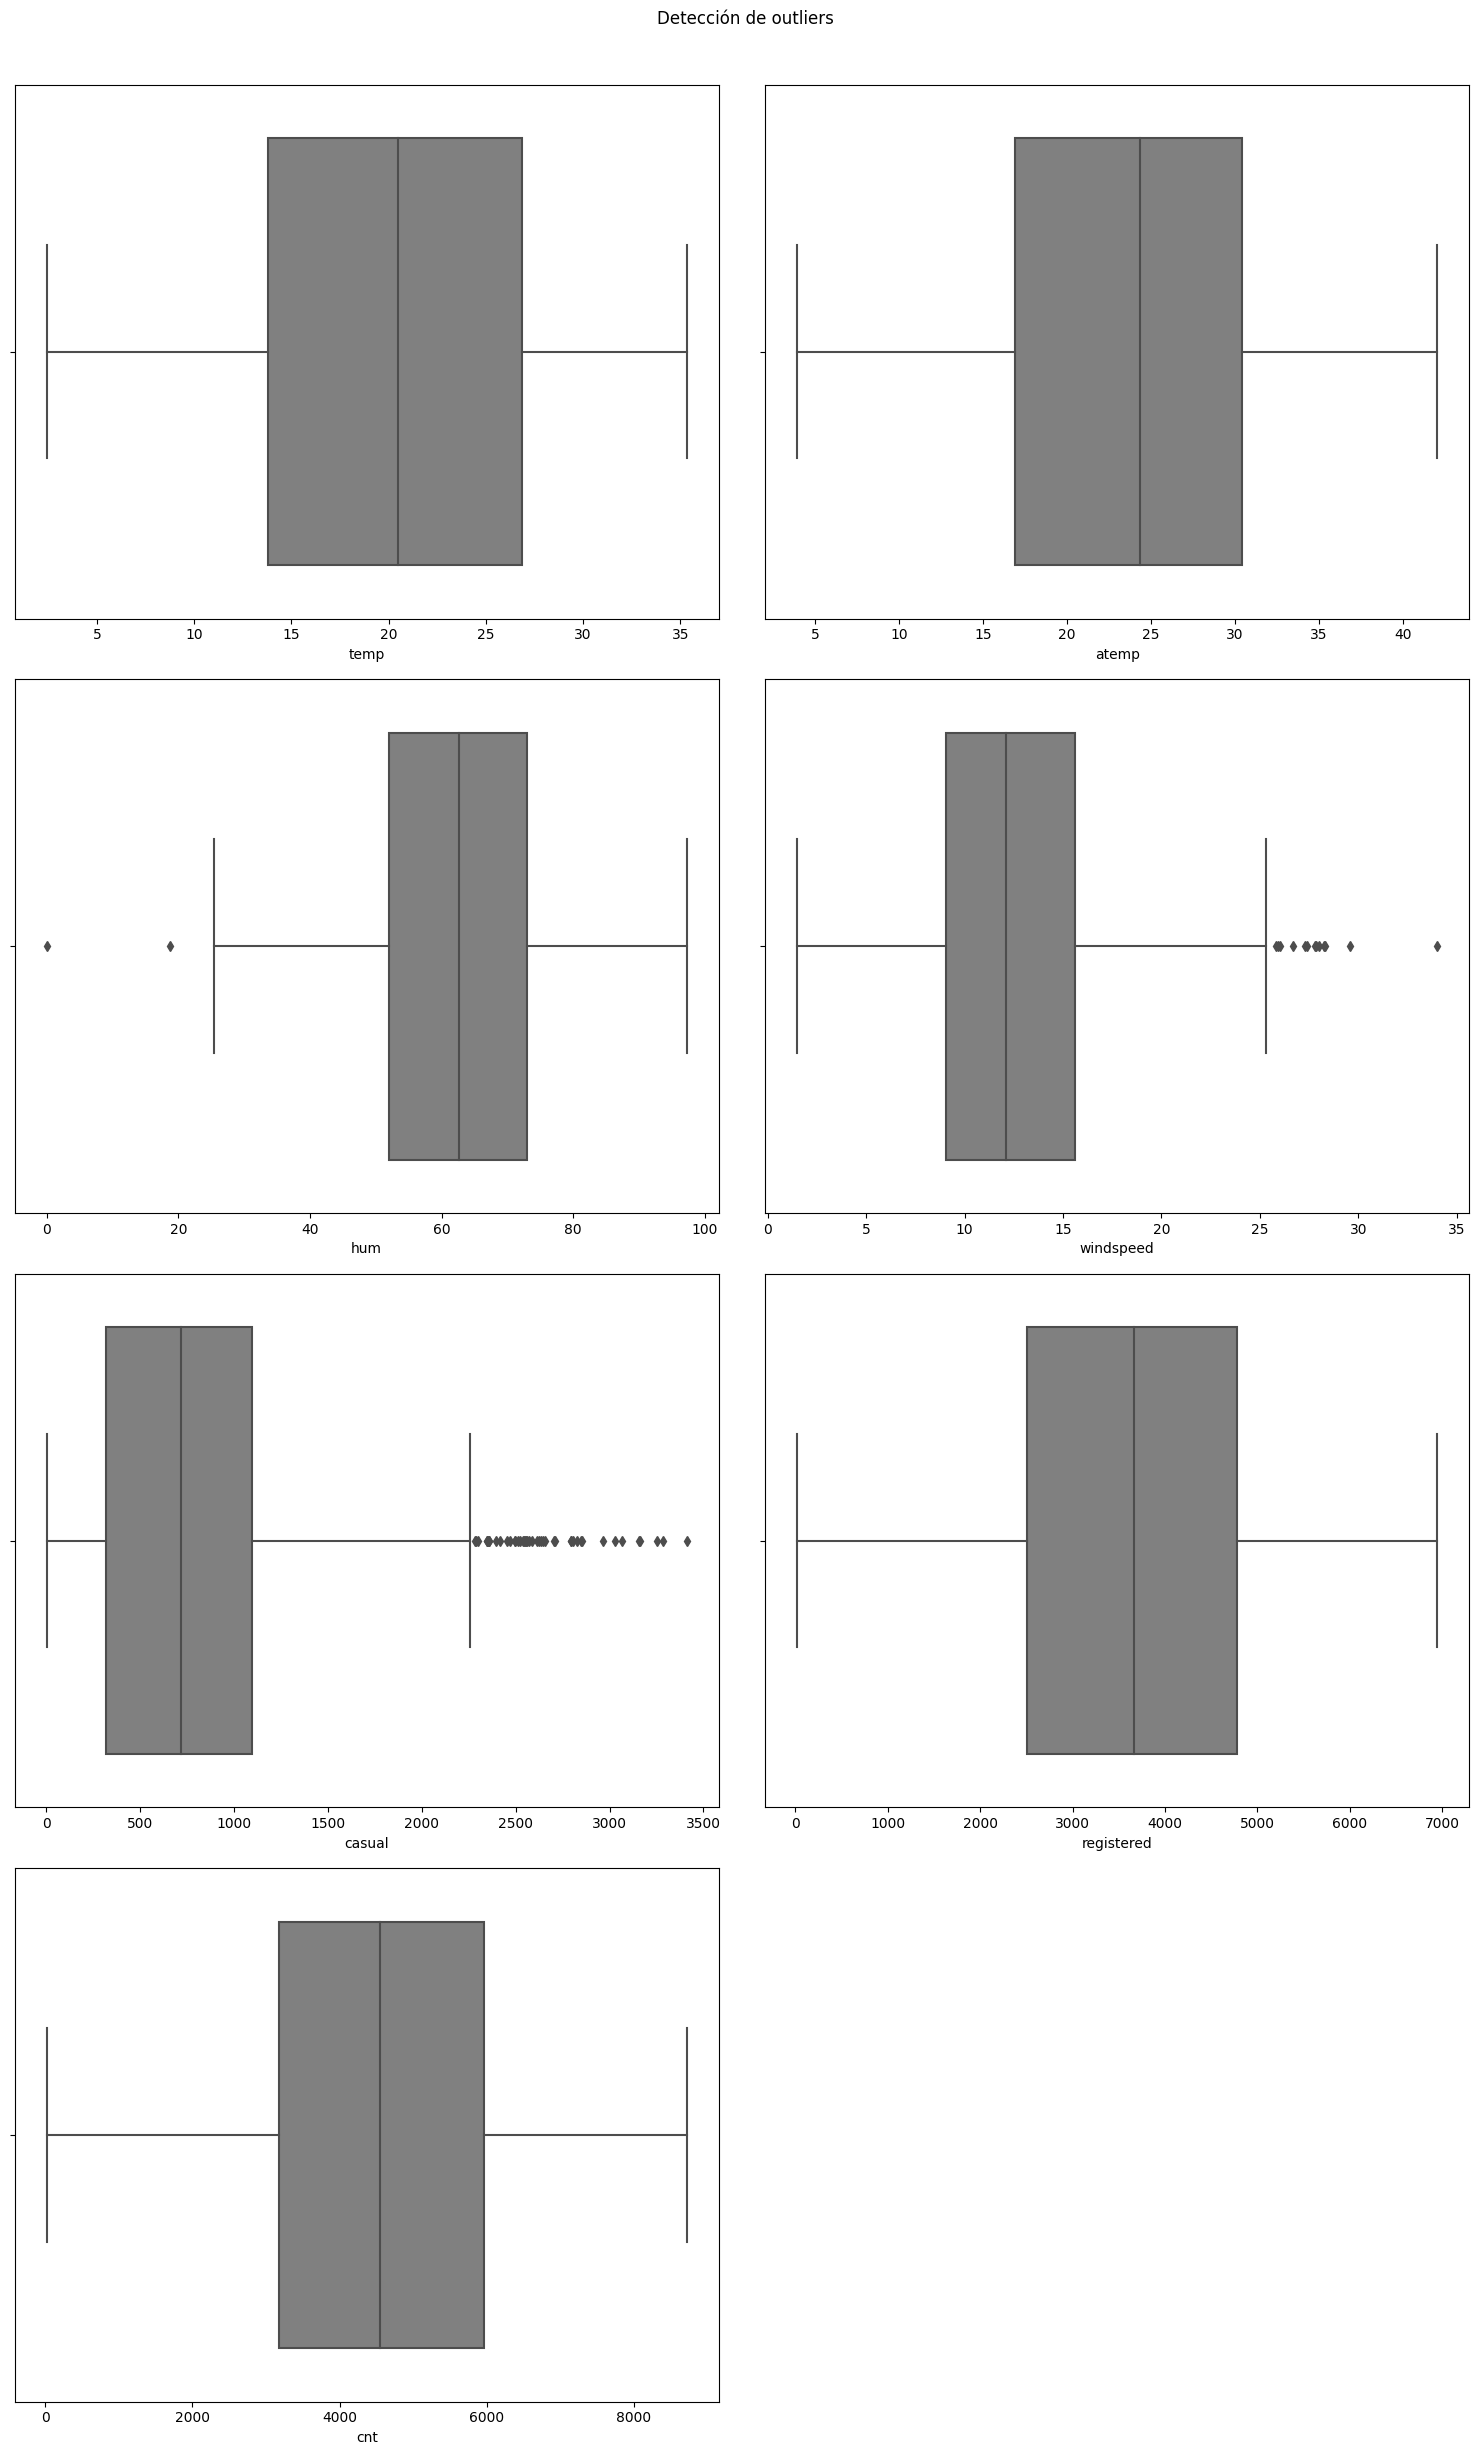

In [47]:
# Boxplot para detección de outliers
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(lista_numericas):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "grey"); # para trazar una línea de densidad

plt.tight_layout()
fig.delaxes(axes[-1])
fig.suptitle('Detección de outliers')
fig.subplots_adjust(top=0.95)
plt.show()

In [48]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    
    for col in lista_columnas:
               
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
                
        IQR = Q3 - Q1
                
        outlier_step = 1.5 * IQR
                
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
                
        if outliers_data.shape[0] > 0:  
        
            dicc_indices[col] = (list(outliers_data.index)) 
            
    return dicc_indices

In [49]:
# Bucle for para printear
for x in numericas:
    try:
        print(f"La columna {x} tiene {len(detectar_outliers([x],numericas)[x])} outliers")
    except:
        print(f"La columna {x} no tiene outliers")

La columna temp no tiene outliers
La columna atemp no tiene outliers
La columna hum tiene 2 outliers
La columna windspeed tiene 13 outliers
La columna casual tiene 44 outliers
La columna registered no tiene outliers
La columna cnt no tiene outliers


In [50]:
index_hum = detectar_outliers(["hum"],numericas)
len(index_hum["hum"])
#la columna "hum" tiene 2 outliers

2

In [51]:
index_wind = detectar_outliers(["windspeed"],numericas)
len(index_wind["windspeed"])
#la columna windspeed tiene 13 outliers

13

In [52]:
index_casual = detectar_outliers(["casual"],numericas)
len(index_casual["casual"])
#la columna casual tiene 44 outliers

44

### Tratamiento de outliers

En ese caso se decide tratar los outliers de las columnas humedad y velocidad de viento con la mediana y hacer una división de dataframe entre las personas usuarias casuales y las registradas.


In [53]:
# Gestión de utliers de humedad, reemplazar por mediana
for k, v in index_hum.items():
    median = numericas[k].median()
    for i in v:
        numericas.loc[i,k] = median


In [54]:
# Gestión de utliers de velocidad del viento, reemplazar por mediana
for k, v in index_wind.items():
    median = numericas[k].median()
    for i in v:
        numericas.loc[i,k] = median

In [55]:
for k, v in index_casual.items():
    median = numericas[k].median()
    for i in v:
        numericas.loc[i,k] = median

In [56]:
lista_eliminar = numericas.columns.to_list()
lista_eliminar

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [57]:
# Eliminamos aquellas columnas no depuradas
df.drop(lista_eliminar, axis = 1, inplace=True)

In [58]:
df.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit
instant,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2
2,2018-01-02,winter,0,1,0,1,tuesday,1,2


In [59]:
df[numericas.columns]= numericas
df.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801


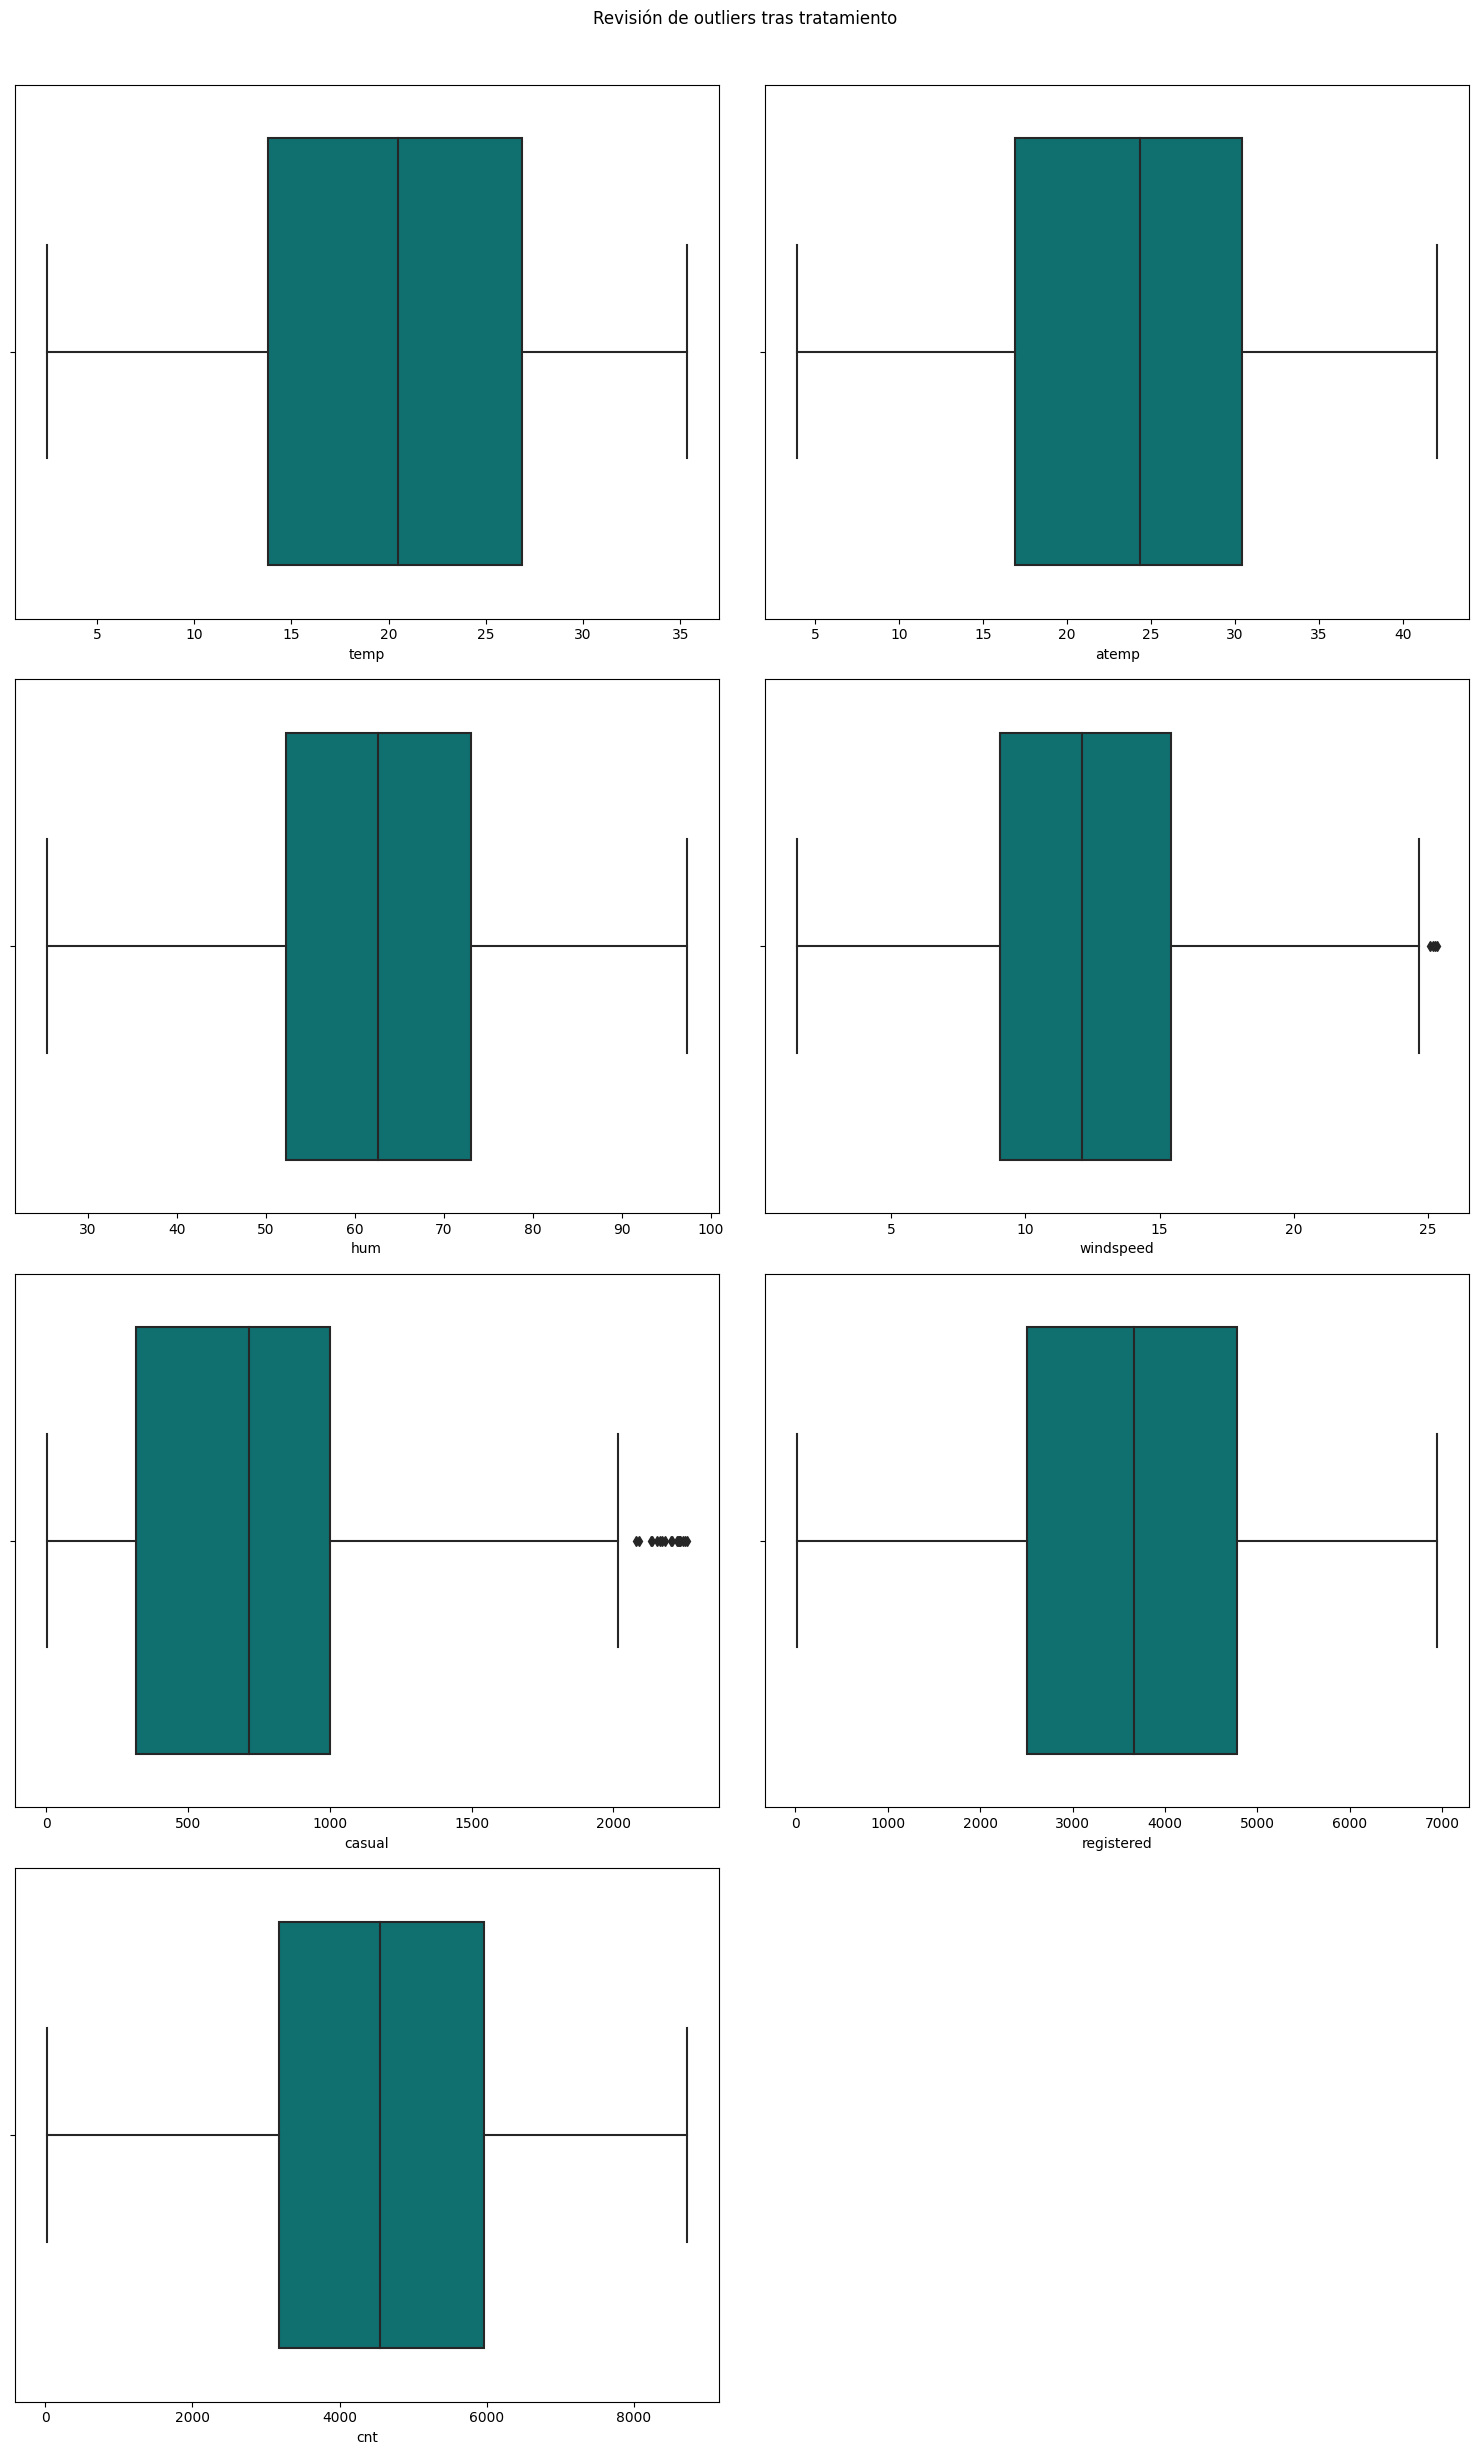

In [60]:
# Observamos el tratamiento de outliers de las columnas humedad y velocidad del viento
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(lista_numericas):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "teal"); # para trazar una línea de densidad

plt.tight_layout()
fig.delaxes(axes[-1])
fig.suptitle('Revisión de outliers tras tratamiento')
fig.subplots_adjust(top=0.95)
plt.show()

# Guardamos el dataset con tratamiento de outliers

In [61]:
df.to_csv("datos/1.bikes_outliers.csv")

In [62]:
df.to_pickle("datos/1.bikes_outliers.pkl")

# Análisis de variables respuesta y variables predictoras

En este caso se realizará un modelo para el número de bicis que se alquilan por día, para ello se dividirá entre usuarios casuales y registrados y se sumarán sus resultados.

Eliminamos la columna cnt ya que es el resultado de la suma de los usuarios casuales más los registrados.

In [63]:
df.drop(["cnt"], axis=1, inplace=True)

In [64]:
df.columns

Index(['dteday', 'seasons', 'yr', 'mnth', 'holiday_num', 'weekday_num',
       'weekday_cat', 'workingday_num', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered'],
      dtype='object')

## `` Distribución de las Variables respuesta ``

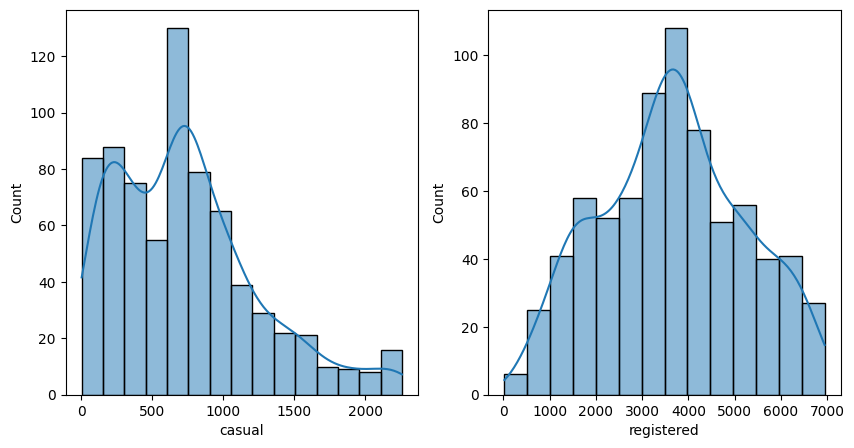

In [65]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes= axes.flat

sns.histplot(data = df, x = "casual", kde = True , ax = axes[0]);
sns.histplot(data = df, x = "registered",  kde = True, ax = axes[1]);

## ``Variables predictoras numéricas``

In [66]:
df.columns

Index(['dteday', 'seasons', 'yr', 'mnth', 'holiday_num', 'weekday_num',
       'weekday_cat', 'workingday_num', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered'],
      dtype='object')

In [67]:
columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], dtype='object')

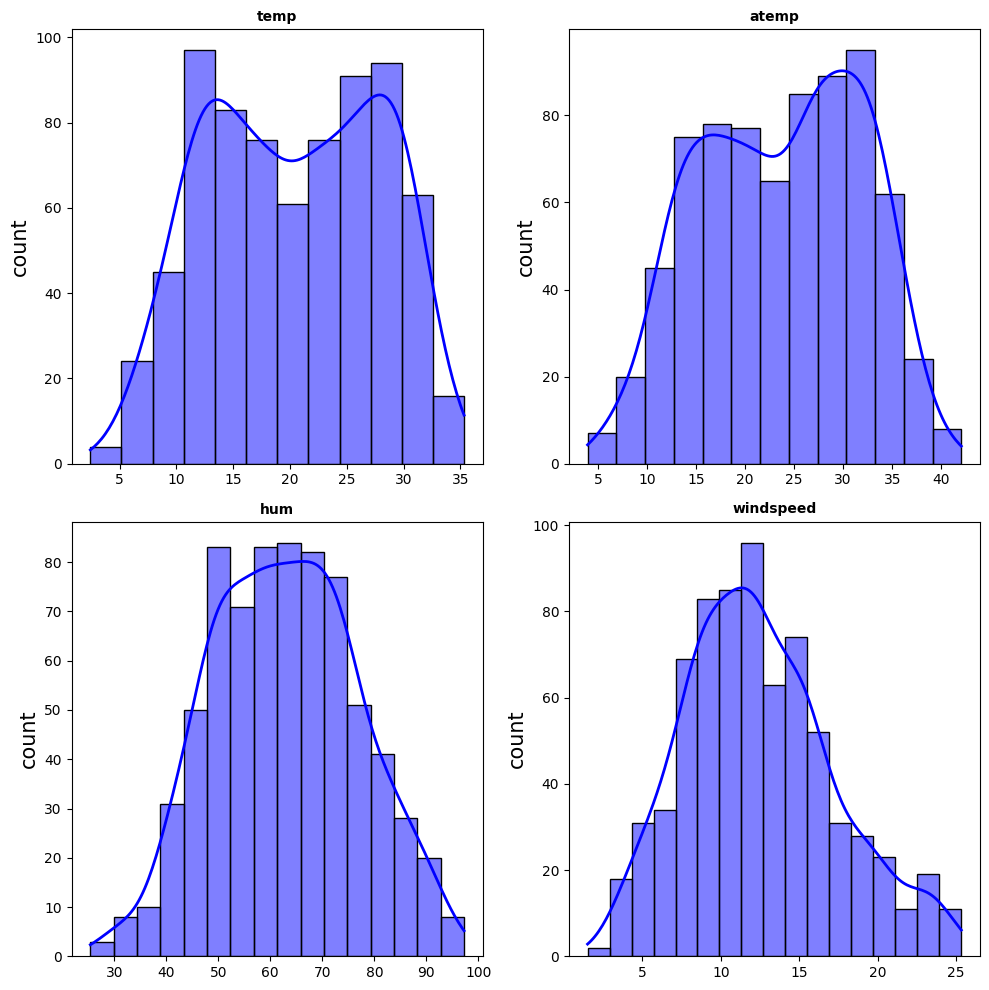

In [68]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["casual","registered"])

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = "blue", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "count", fontsize = 15)


fig.tight_layout();

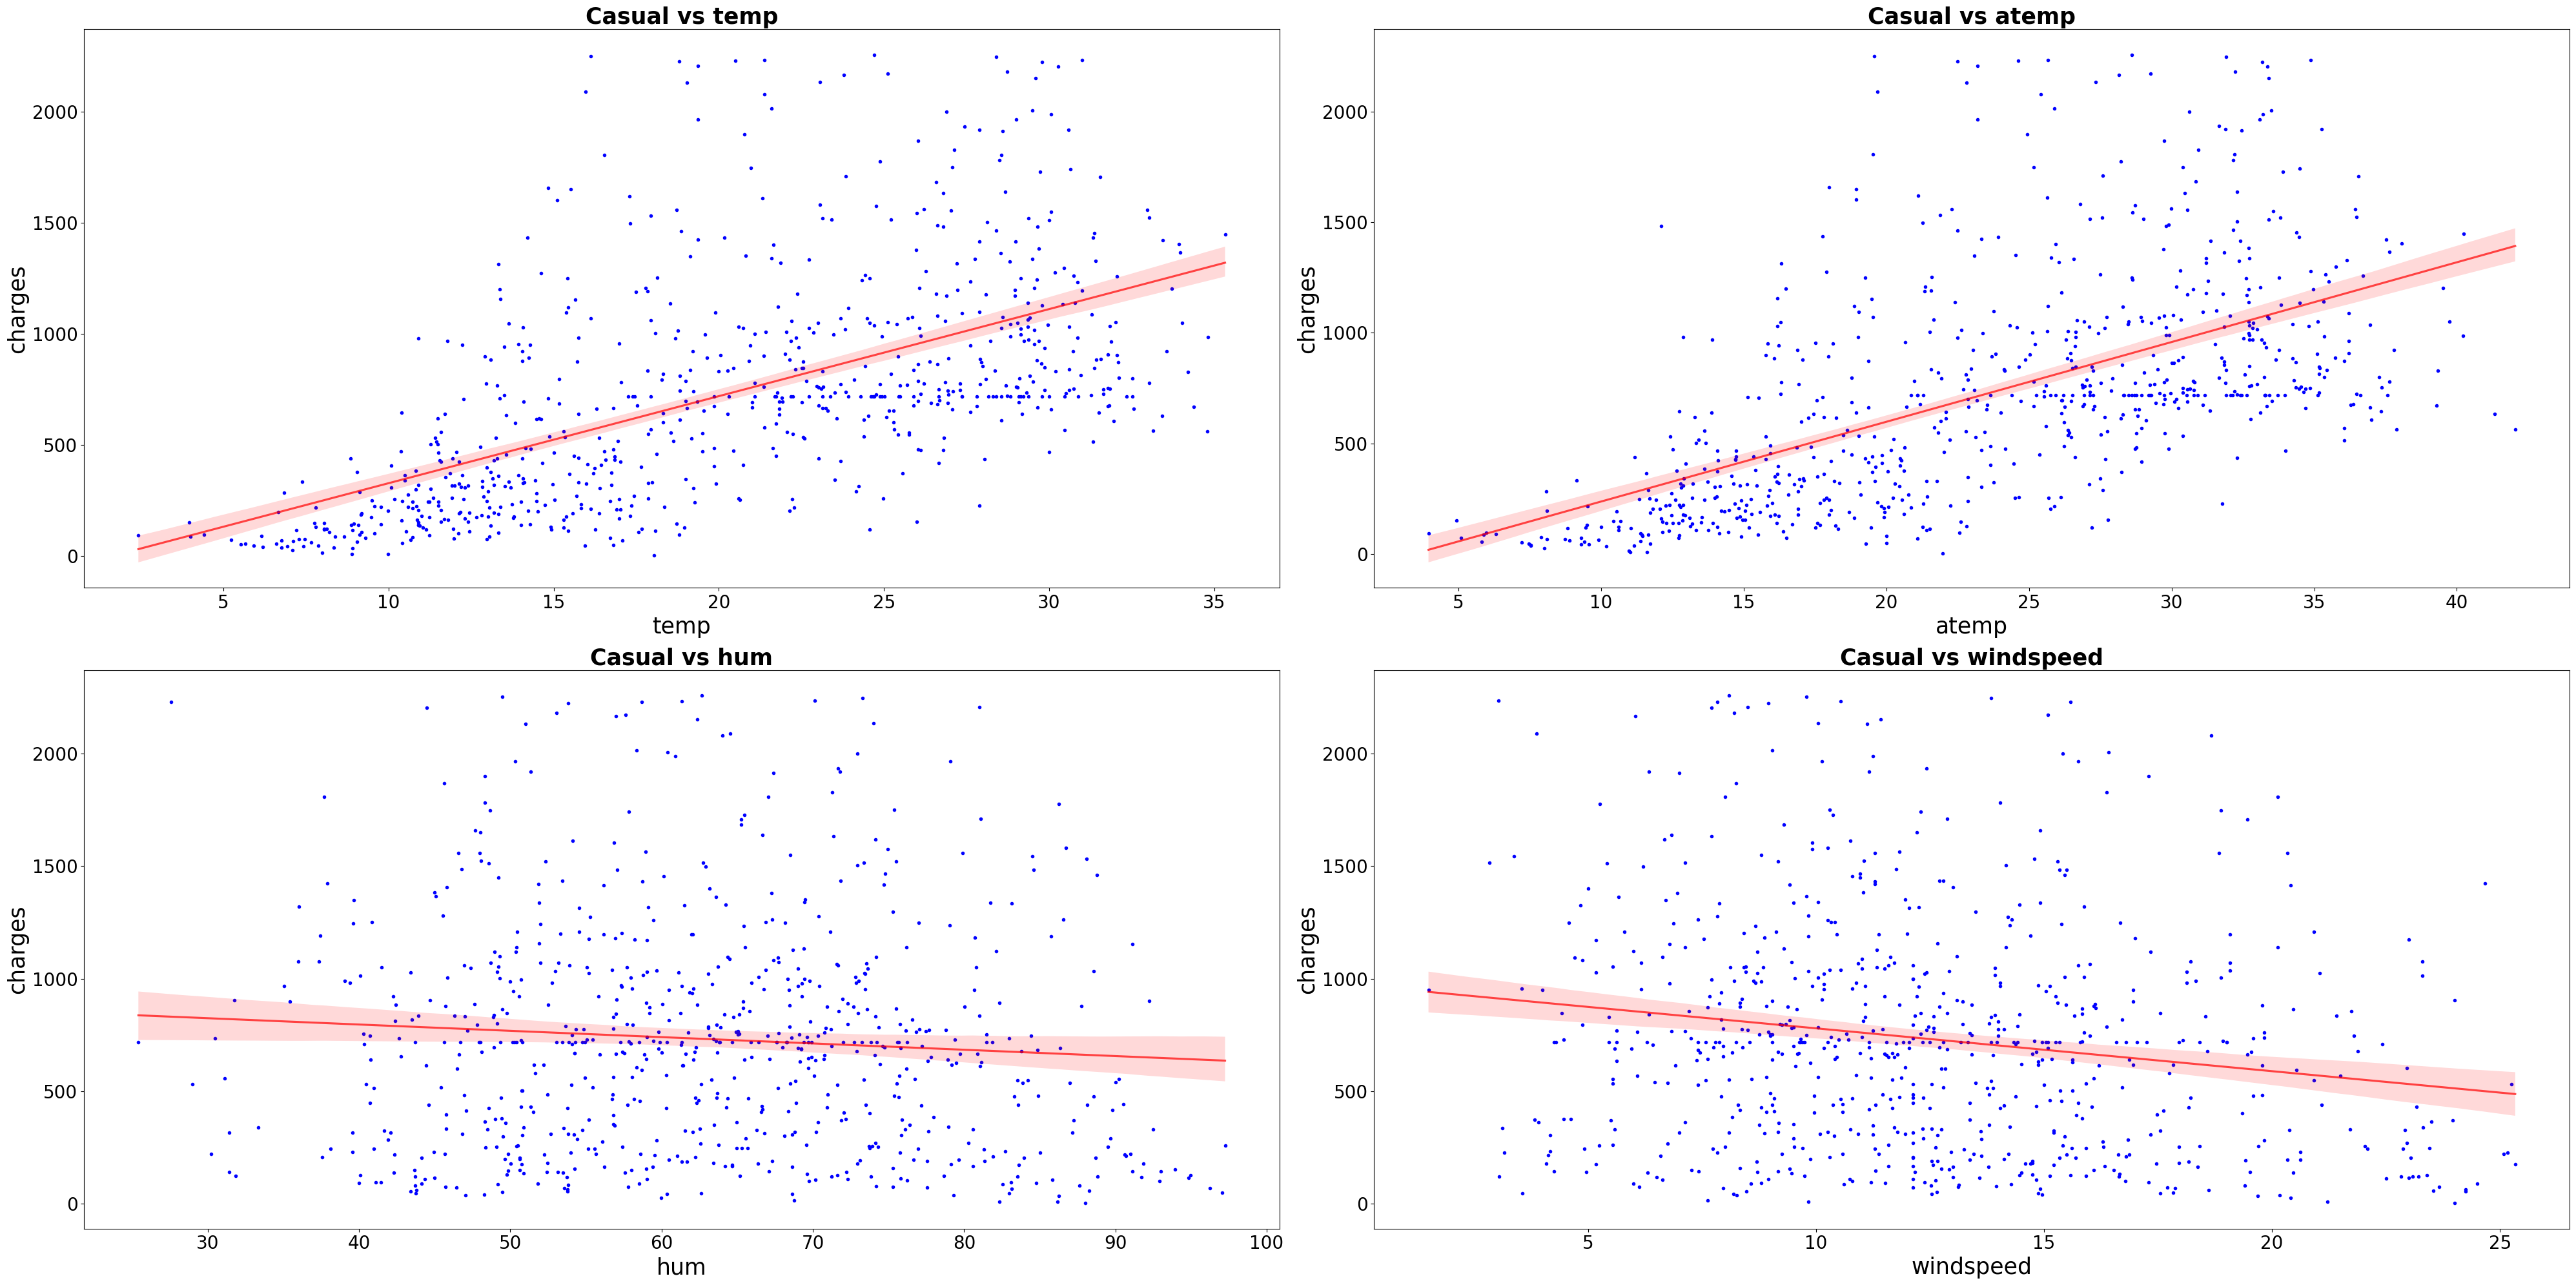

In [69]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["casual", "registered"])

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["casual"], 
        color = "blue", 
        marker = ".", 
        scatter_kws = {"alpha": 0.99}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Casual vs {colum}", fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel(colum, fontsize = 25)
    axes[i].set_ylabel( "charges", fontsize = 25)
    
fig.tight_layout();

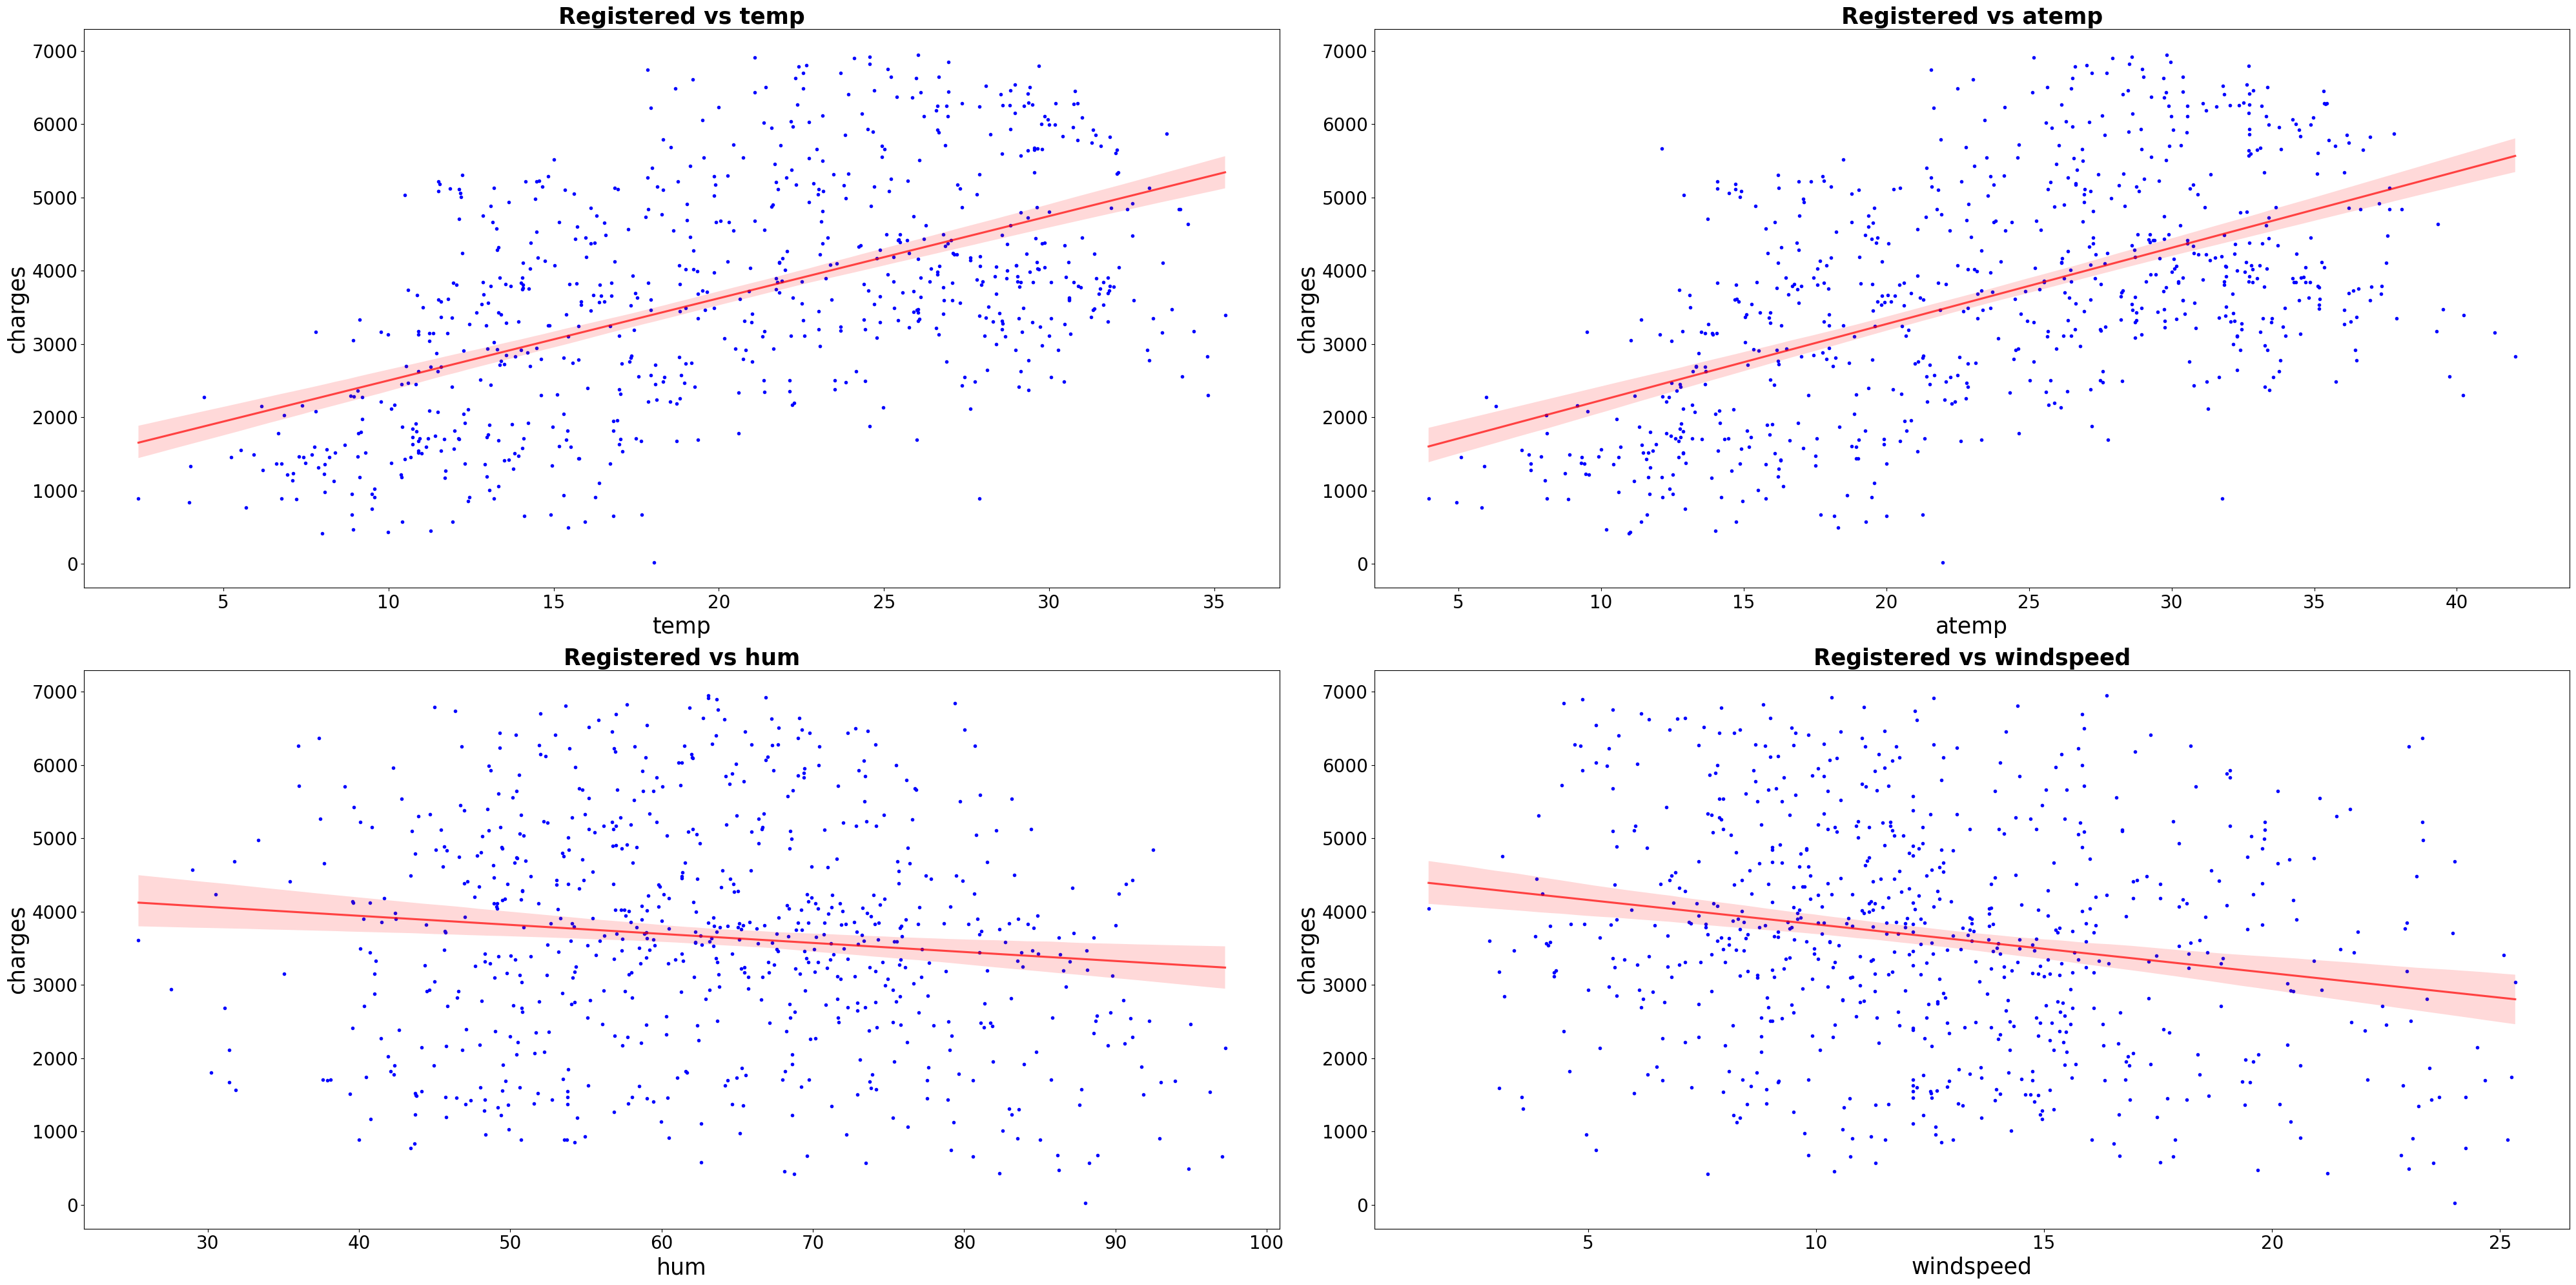

In [70]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["casual", "registered"])

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["registered"], 
        color = "blue", 
        marker = ".", 
        scatter_kws = {"alpha": 0.99}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Registered vs {colum}", fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel(colum, fontsize = 25)
    axes[i].set_ylabel( "charges", fontsize = 25)
    
fig.tight_layout();

## ``Variables predictoras categóricas``

Index(['seasons', 'yr', 'mnth', 'holiday_num', 'weekday_num', 'weekday_cat',
       'workingday_num', 'weathersit'],
      dtype='object')


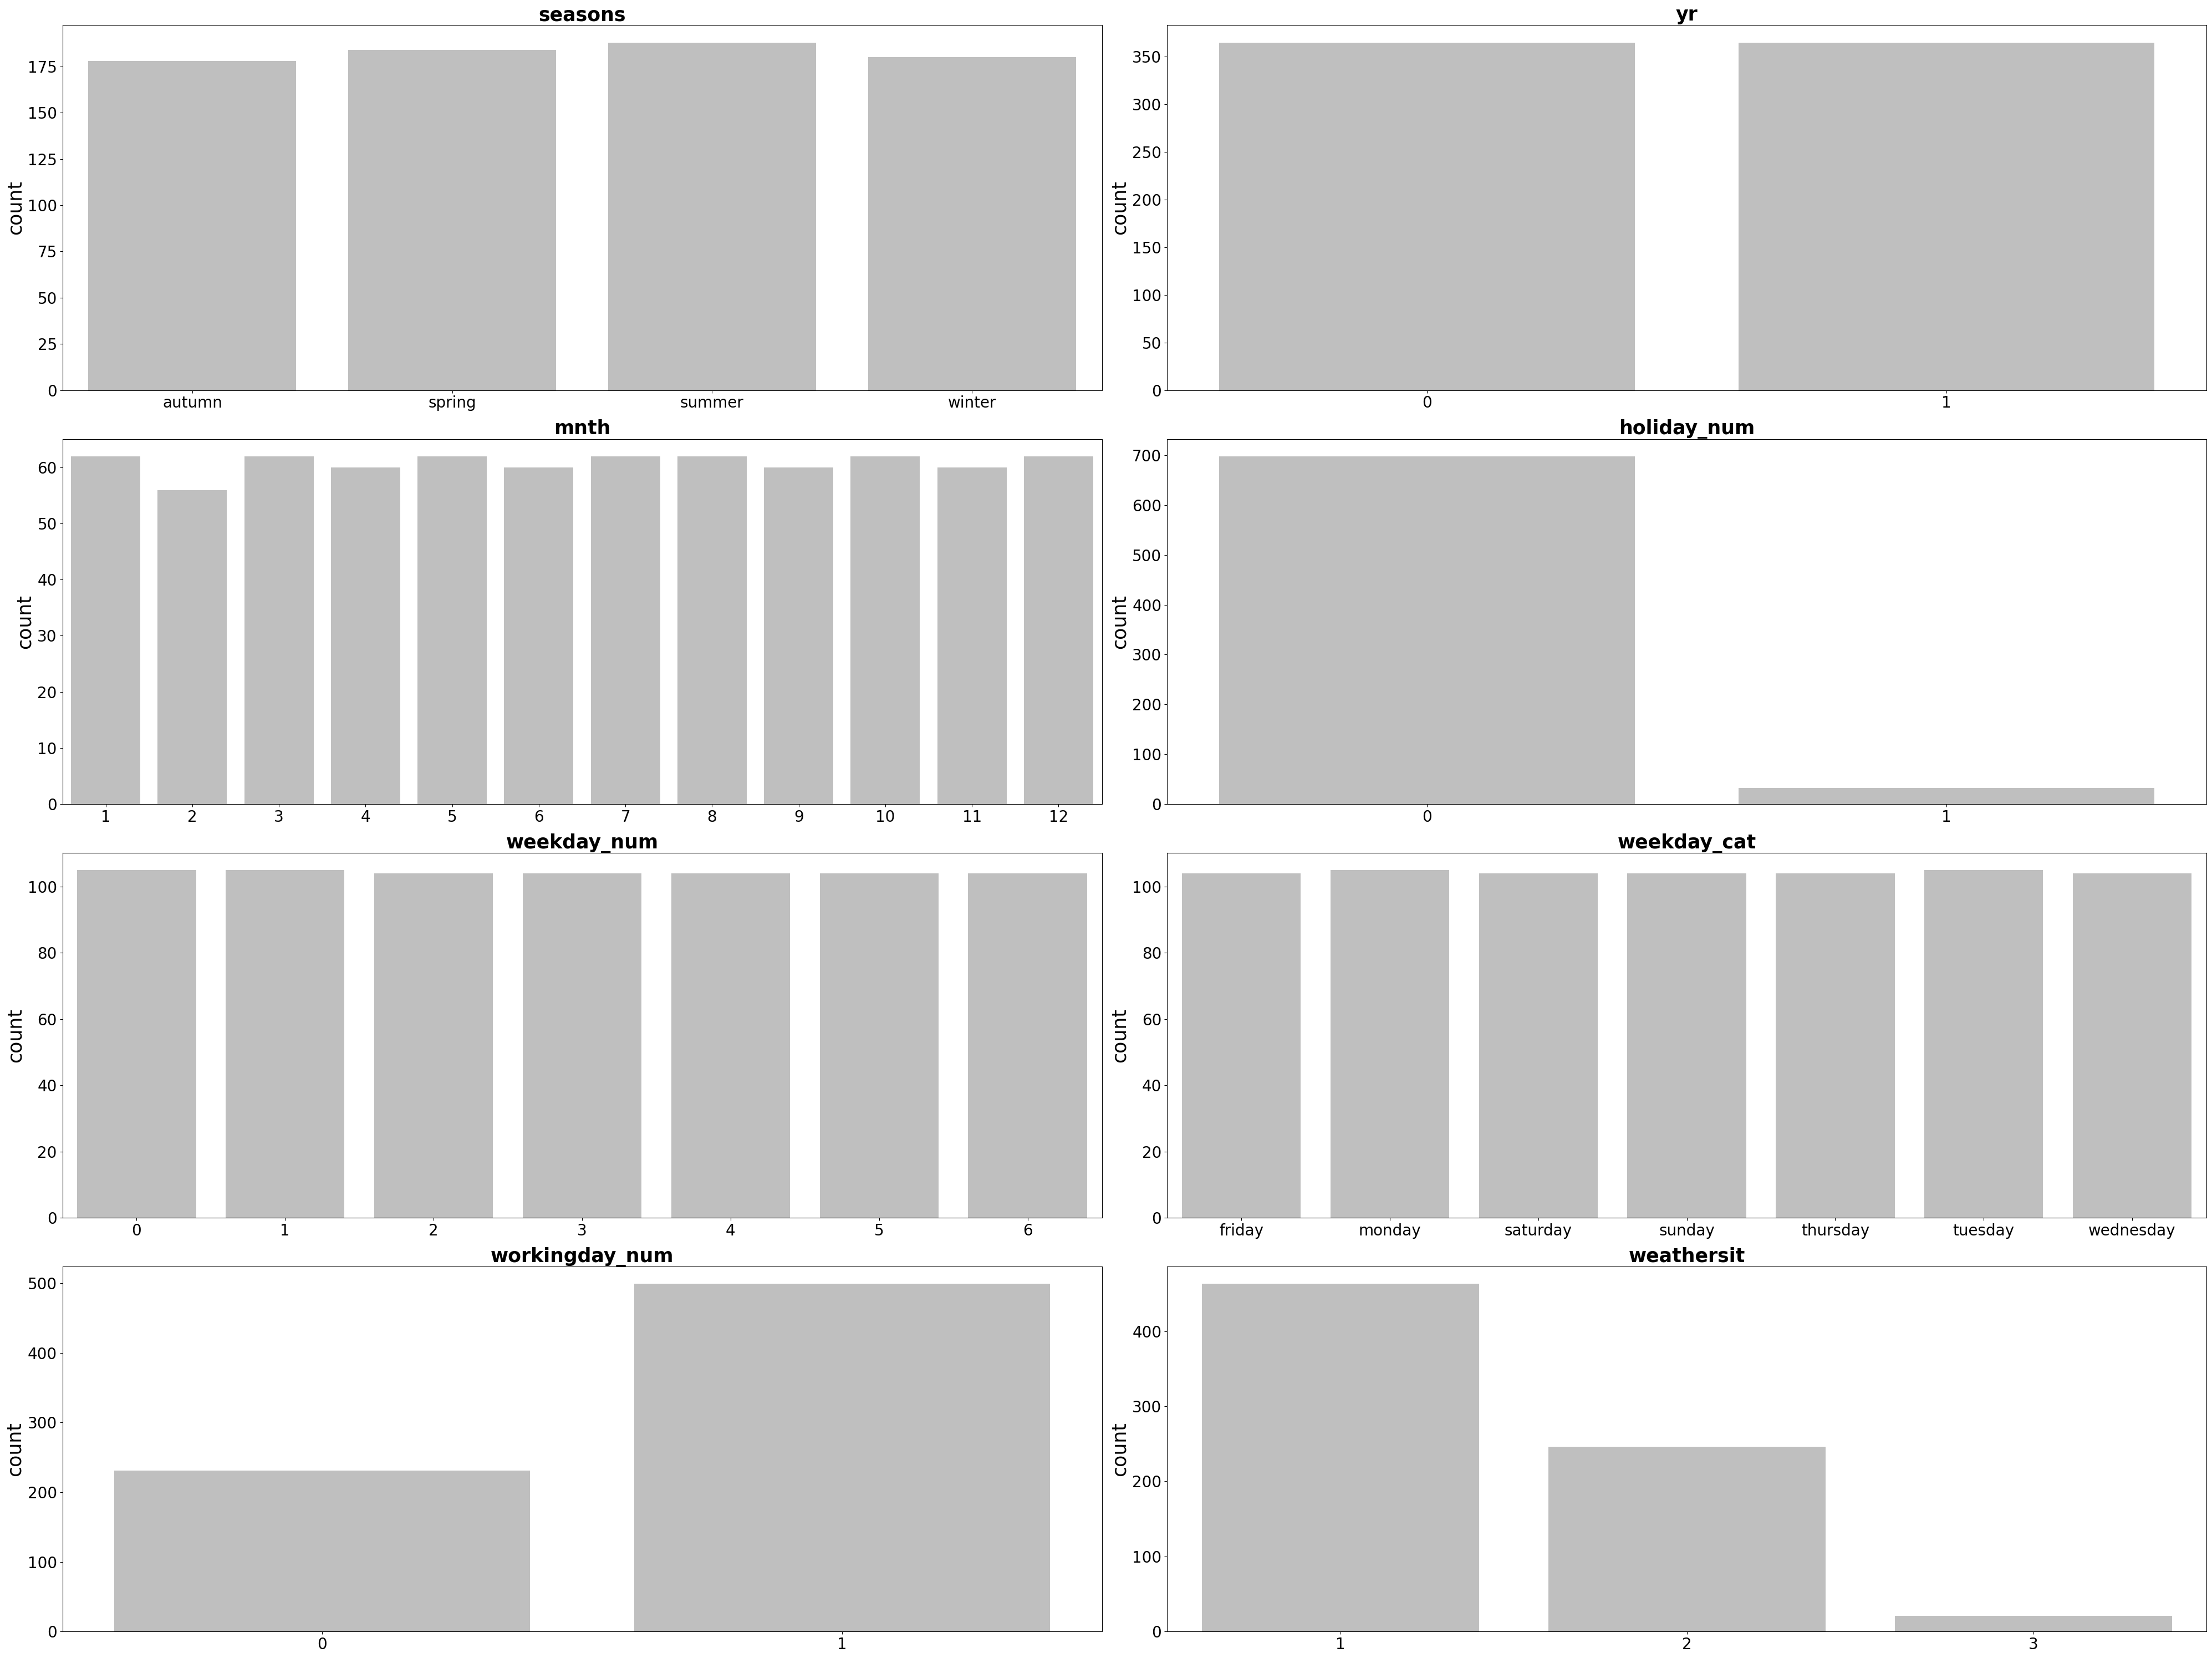

In [71]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (40, 30))


axes = axes.flat

columnas_cat = df.select_dtypes(include =['category','object']).columns
print(columnas_cat)

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        color = "gray", 
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "count", fontsize = 25)


fig.tight_layout();

# Asunciones

H0 : datos normales
H1: datos no normales

Por lo tanto: 

- Si p-valor < 0.05 rechazamos H0 --> DATOS NO NORMALEs

- Si p-valor > 0.05 aceptamos H0 -- DATOS NORMALES

## ``Variable casual``

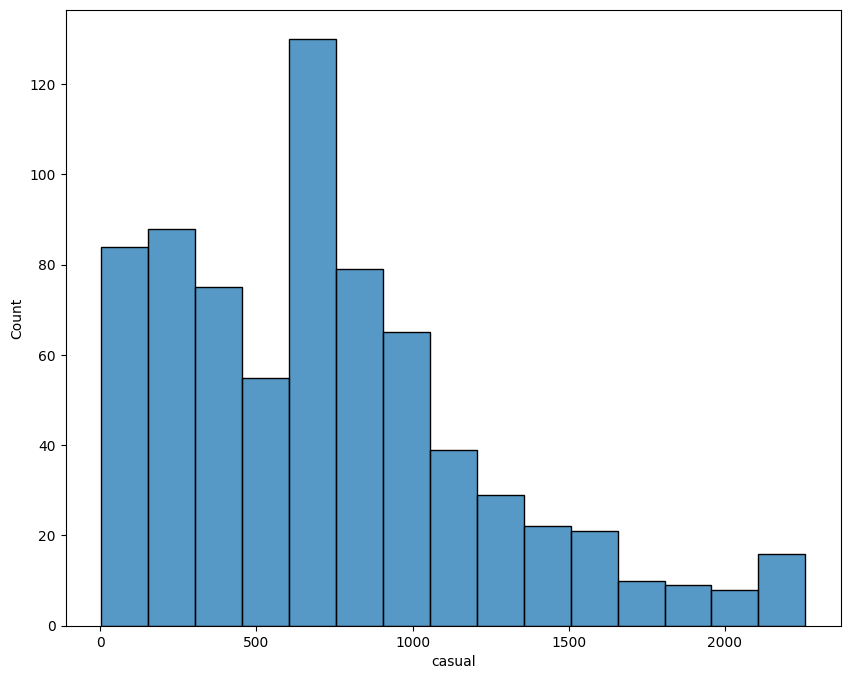

In [72]:
sns.histplot(data = df, x = "casual");

In [73]:
stats.shapiro(df["casual"])

ShapiroResult(statistic=0.9349538683891296, pvalue=2.6878261240510272e-17)

- p_valor menor a 0.05, por lo tanto, los datos de la columna casual NO SON NORMALES

## ``Variable registered``

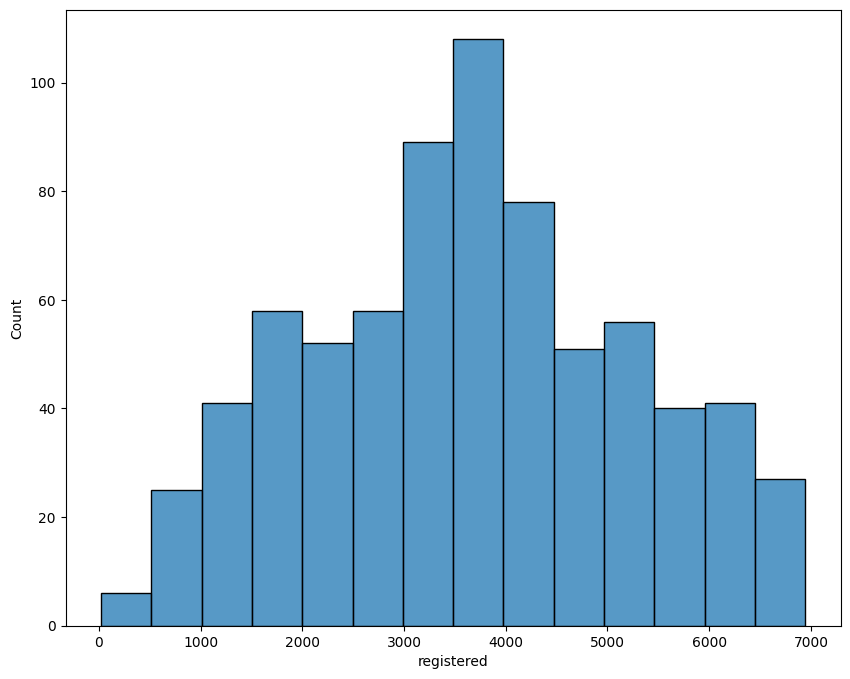

In [74]:
sns.histplot(data = df, x = "registered");

In [75]:
stats.shapiro(df["registered"])

ShapiroResult(statistic=0.9843854308128357, pvalue=5.023125027037167e-07)

- p_valor menor a 0.05, por lo tanto, los datos de la columna registered NO SON NORMALES

## Independencia

Aquí tenemos dos formas de testearlo, con la matriz de correlación y con el Chi-cuadrado


### Análisis de correlación

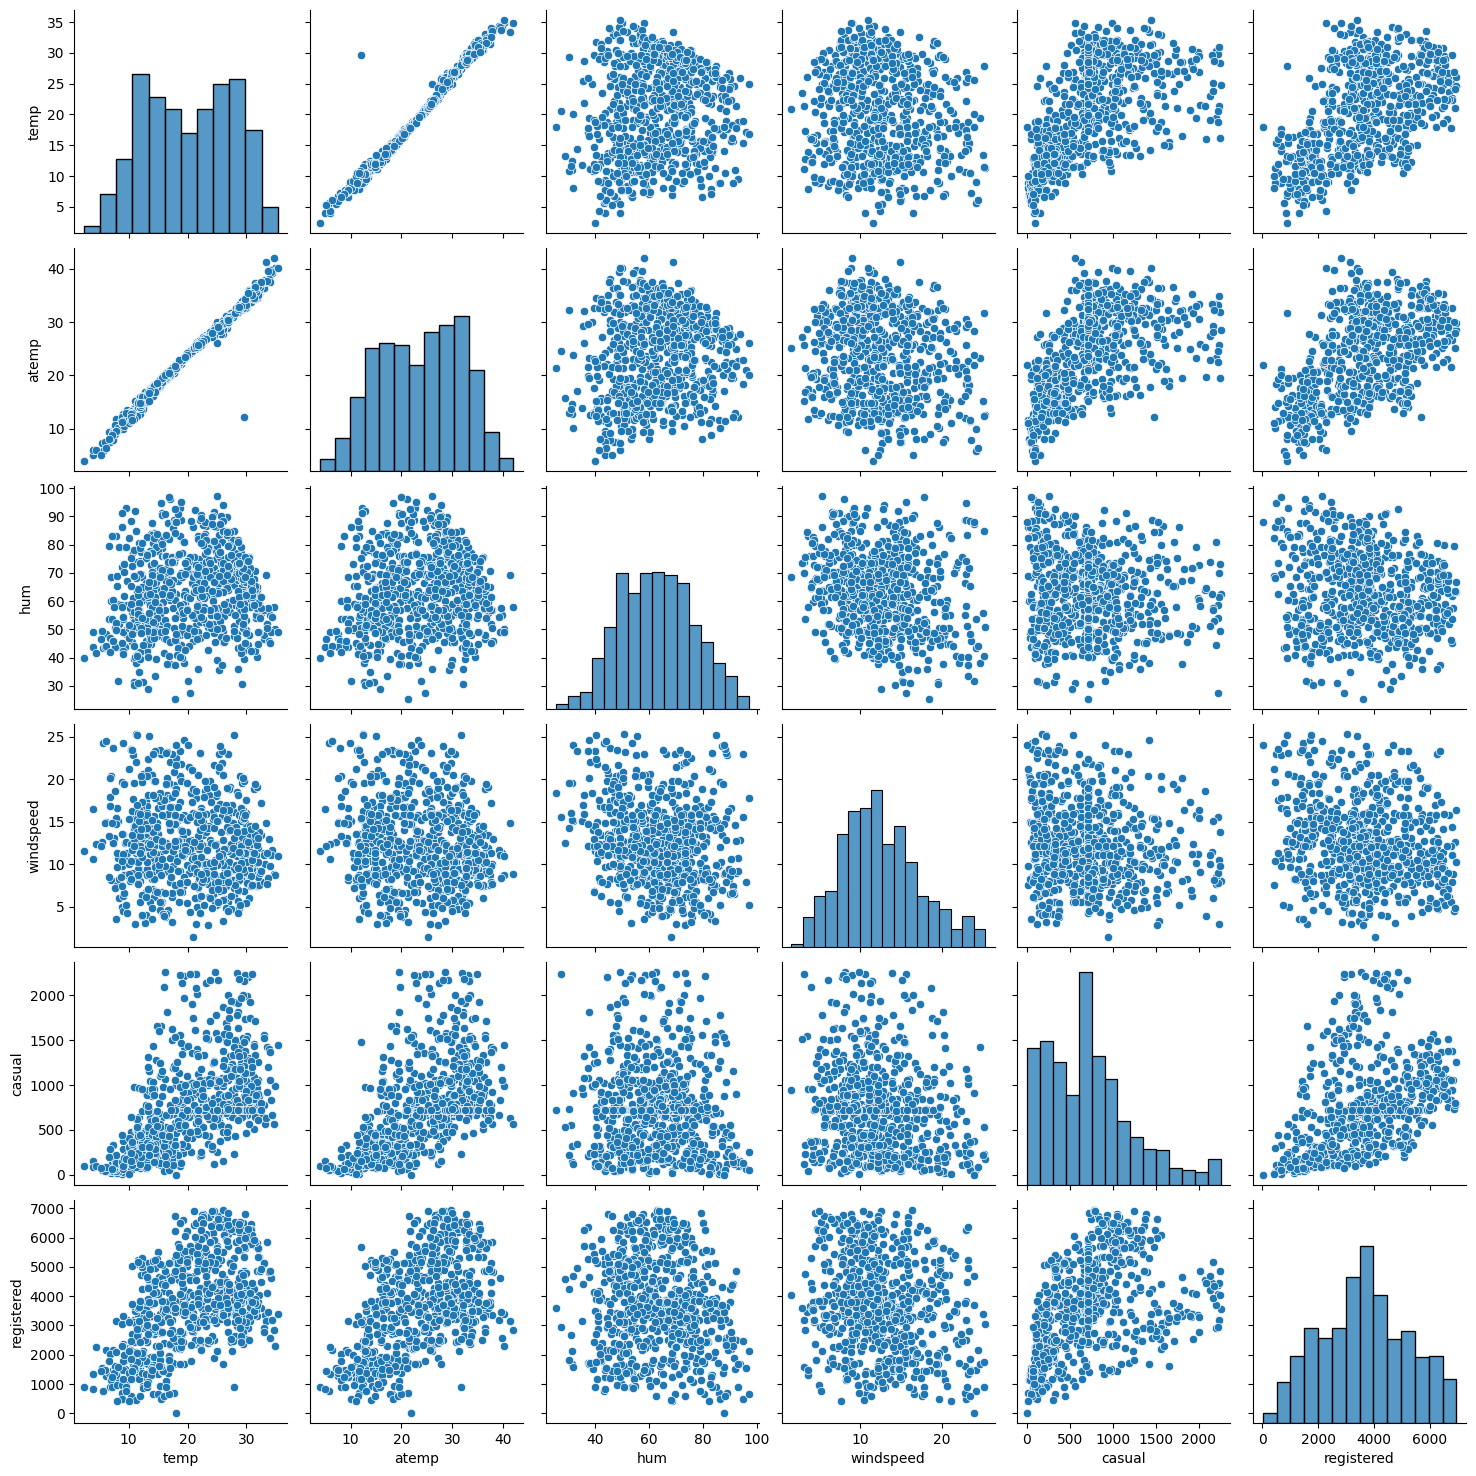

In [76]:
sns.pairplot(df)

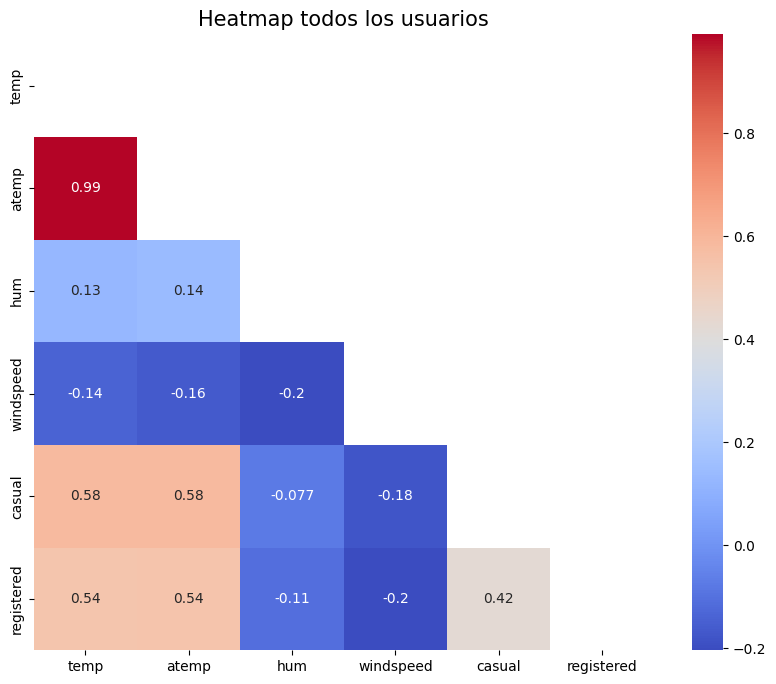

In [77]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

sns.heatmap(df.corr(), # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.
            cmap = "coolwarm", # para especoficar el color del mapa
           annot = True, 
           mask = mask); # para sacar el valor de la correlación
plt.title("Heatmap todos los usuarios", fontsize =15)
plt.show()

#### Conclusiones:
Tras observar las relaciones, observamos columnas redundantes, por lo que decidimos:

**Borrar:**

- *temp*: temperatura

**Trabajar con:**

- *atemp*: consideramos que la variable sensación térmica es más adecuada ya que contempla dos datos. En invierno este valor depende de la combinación de temperatura y viento, y en verano es resultado de la combinación de temperatura y humedad relativa.  
 [referencia: meteo navarra](http://meteo.navarra.es/win/sensaciontermica.cfm#:~:text=Aunque%20la%20temperatura%20del%20aire,al%20igual%20que%20la%20temperatura.)

In [78]:
df.drop("temp", axis=1, inplace= True)

### Método Chi cuadraro


Para el Chi cuadrado:

H0: variables independientes 
H1: variables dependientes

- p-valor < 0.05 rechazamos H0 --> VARIABLES DEPENDIENTES
- p valor > 0.05 aceptamos H0 --> VARIABLES INDEPENDIENTES

In [79]:
predictoras = df.select_dtypes(include = ["object", "category"])
# predictoras.drop(["casual","registered"], axis=1, inplace=True)
predictoras

,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit
instant,,,,,,,,
1,winter,0,1,1,0,monday,0,2
2,winter,0,1,0,1,tuesday,1,2
3,winter,0,1,0,2,wednesday,1,1
4,winter,0,1,0,3,thursday,1,1
5,winter,0,1,0,4,friday,1,1
...,...,...,...,...,...,...,...,...
726,winter,1,12,0,4,friday,1,2
727,winter,1,12,0,5,saturday,0,2
728,winter,1,12,0,6,sunday,0,2


In [80]:
from itertools import combinations
 
 # size of combination is set to 3
combinaciones = list(combinations(predictoras, 2))
print(combinaciones) 

[('seasons', 'yr'), ('seasons', 'mnth'), ('seasons', 'holiday_num'), ('seasons', 'weekday_num'), ('seasons', 'weekday_cat'), ('seasons', 'workingday_num'), ('seasons', 'weathersit'), ('yr', 'mnth'), ('yr', 'holiday_num'), ('yr', 'weekday_num'), ('yr', 'weekday_cat'), ('yr', 'workingday_num'), ('yr', 'weathersit'), ('mnth', 'holiday_num'), ('mnth', 'weekday_num'), ('mnth', 'weekday_cat'), ('mnth', 'workingday_num'), ('mnth', 'weathersit'), ('holiday_num', 'weekday_num'), ('holiday_num', 'weekday_cat'), ('holiday_num', 'workingday_num'), ('holiday_num', 'weathersit'), ('weekday_num', 'weekday_cat'), ('weekday_num', 'workingday_num'), ('weekday_num', 'weathersit'), ('weekday_cat', 'workingday_num'), ('weekday_cat', 'weathersit'), ('workingday_num', 'weathersit')]


In [81]:
for i in combinaciones:
    crosstab, test_results, expected = rp.crosstab(df[i[0]], df[i[1]],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print(f"INDEPENDENCIA ENTRE {i[0], i[1]} \n", test_results)
    print("........................")


INDEPENDENCIA ENTRE ('seasons', 'yr') 
                 Chi-square test  results
0  Pearson Chi-square ( 3.0) =       0.0
1                    p-value =       1.0
2                 Cramer's V =       0.0
........................
INDEPENDENCIA ENTRE ('seasons', 'mnth') 
                  Chi-square test   results
0  Pearson Chi-square ( 33.0) =   1762.002
1                     p-value =      0.000
2                  Cramer's V =      0.897
........................
INDEPENDENCIA ENTRE ('seasons', 'holiday_num') 
                 Chi-square test  results
0  Pearson Chi-square ( 3.0) =    7.5340
1                    p-value =    0.0567
2                 Cramer's V =    0.1016
........................
INDEPENDENCIA ENTRE ('seasons', 'weekday_num') 
                  Chi-square test  results
0  Pearson Chi-square ( 18.0) =    0.6563
1                     p-value =    1.0000
2                  Cramer's V =    0.0173
........................
INDEPENDENCIA ENTRE ('seasons', 'weekday_cat') 
    

#### Conclusiones
Tras observar los resultaos observamos que existe dependencia entre:
- las estaciones y los meses
- las estaciones y el tipo de clima
- los meses y los días festivos
- los meses y el tipo de clima
- los dias festivos y los días laborables
- columna repetitiva, los dias en numeros y los días categóricos.
- El día d ela semana y los días laborables


``VR Casual``

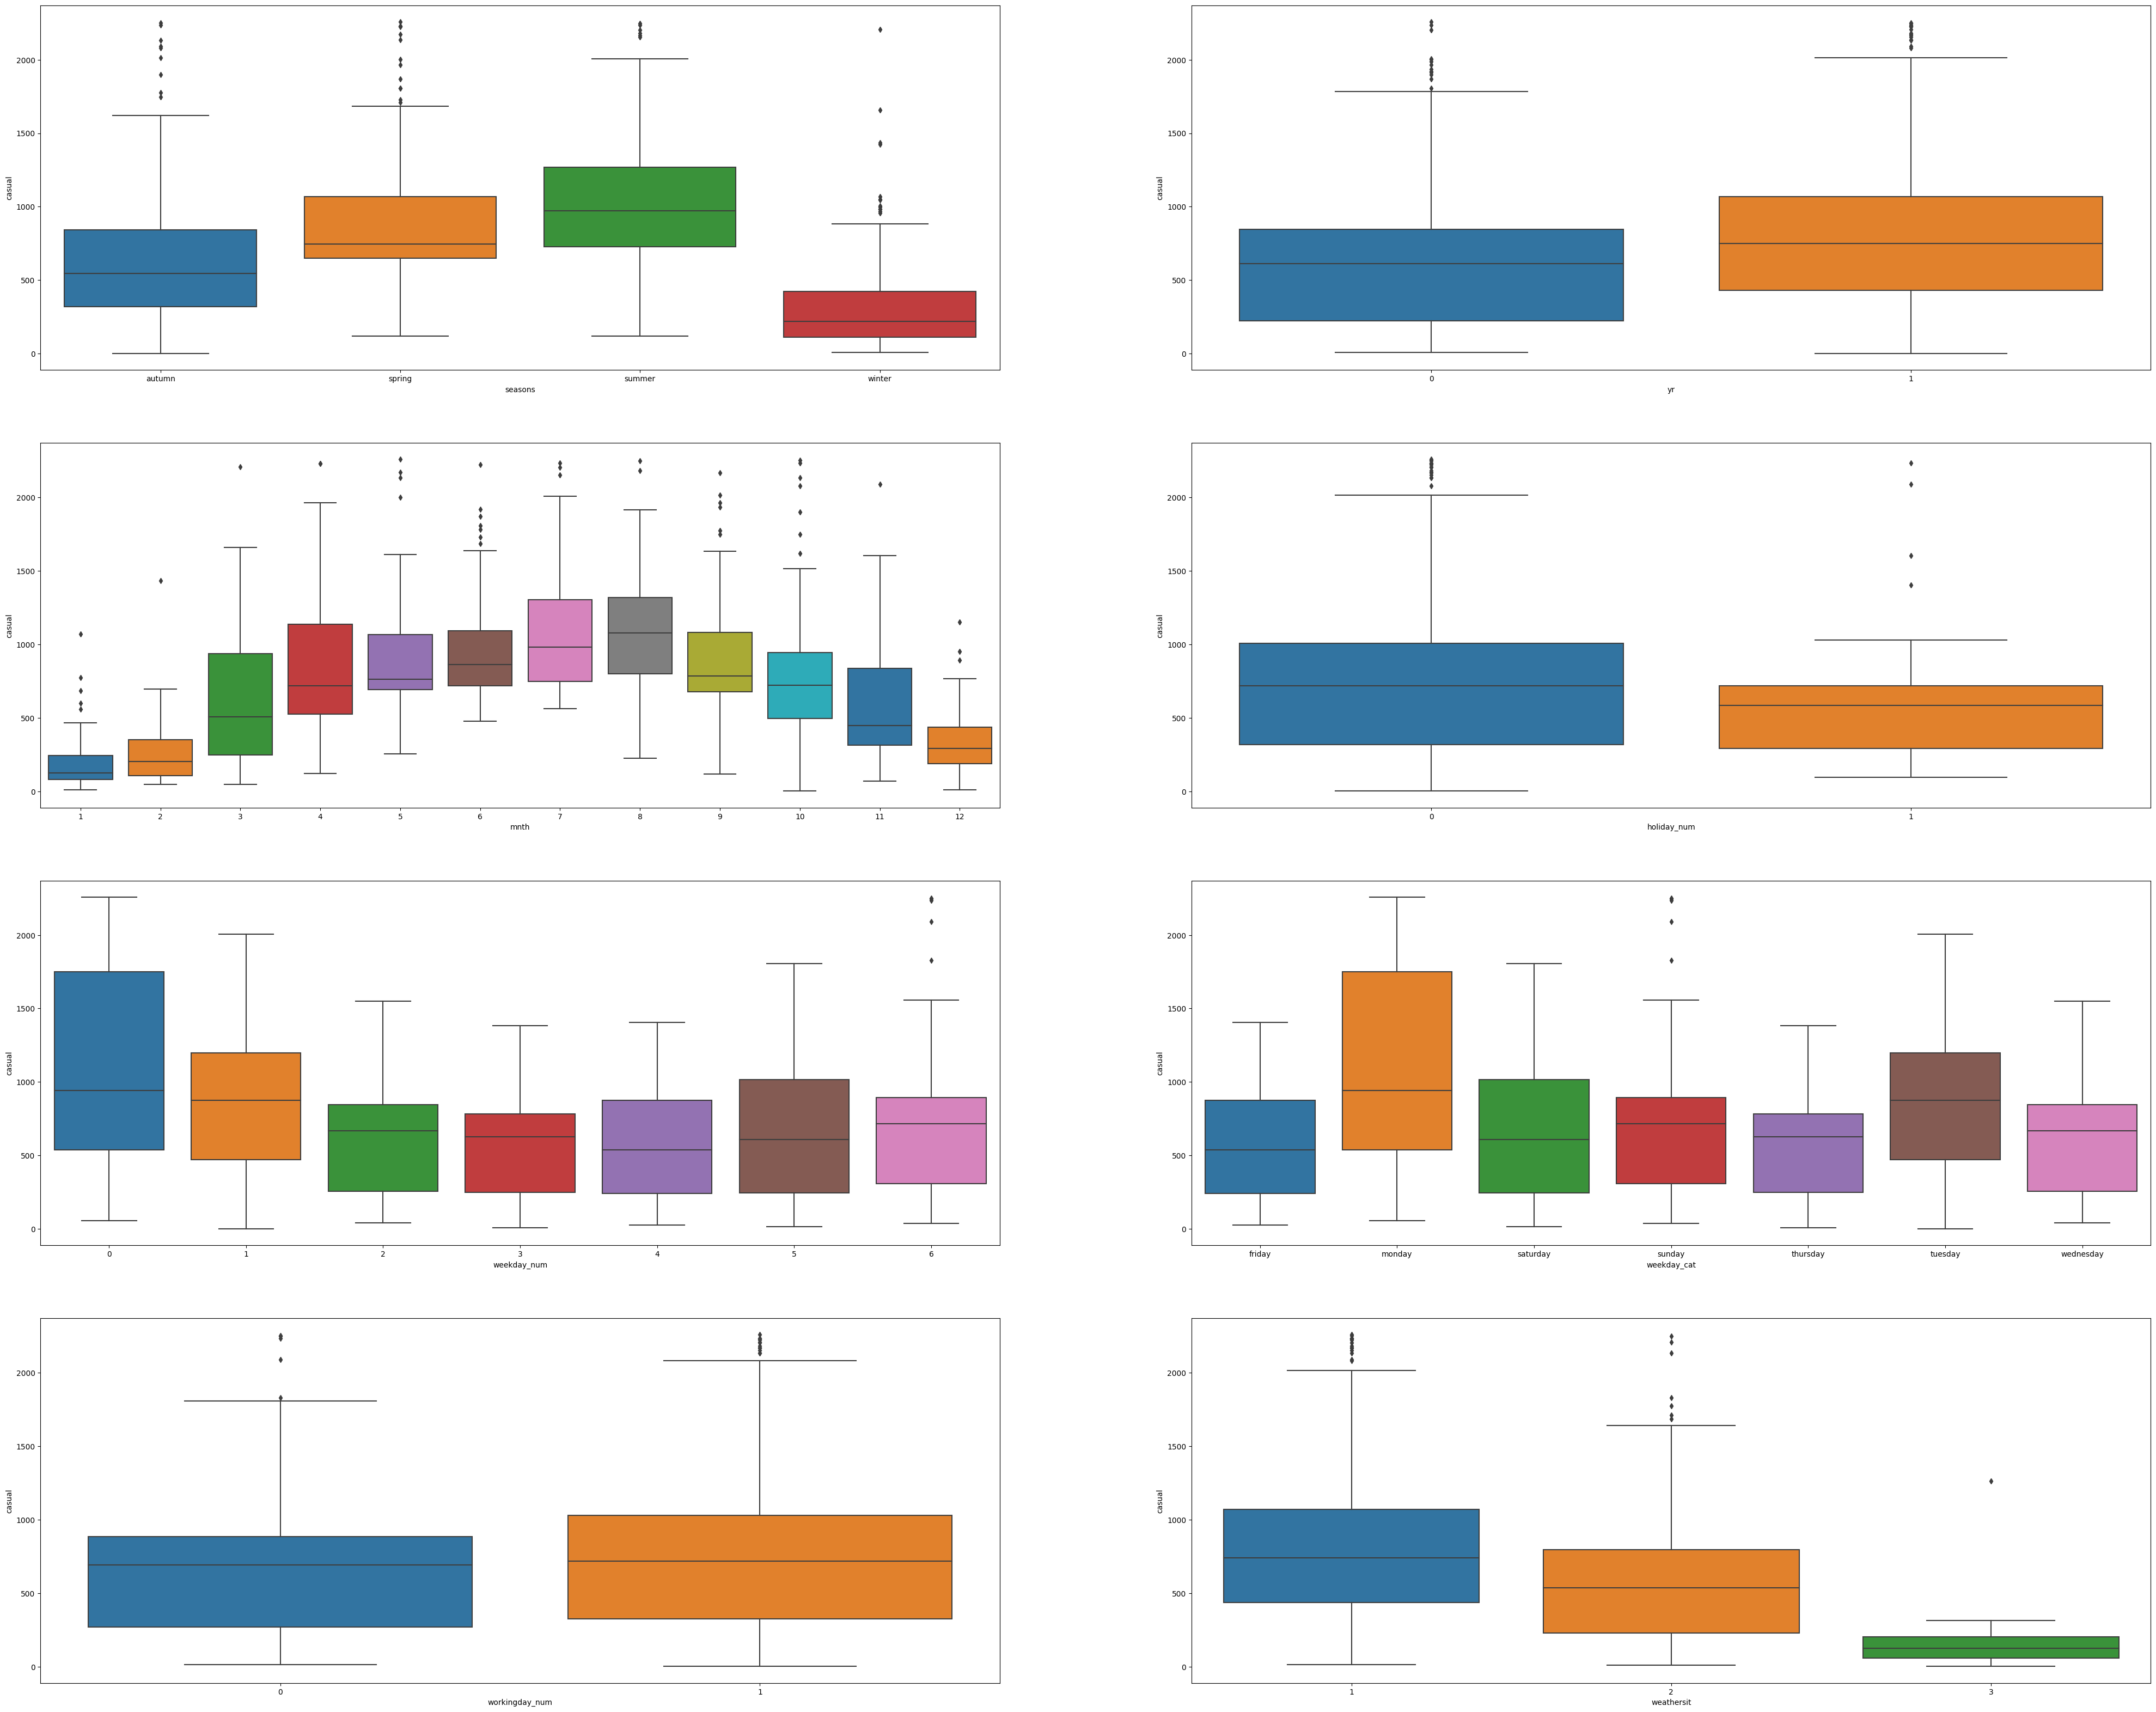

In [82]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (50, 40))

axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat):
    sns.boxplot(
    x       = colum,
    y       = 'casual',
    data    = df,
    palette = 'tab10',
    ax      = axes[i]
    )

``VR Registered``

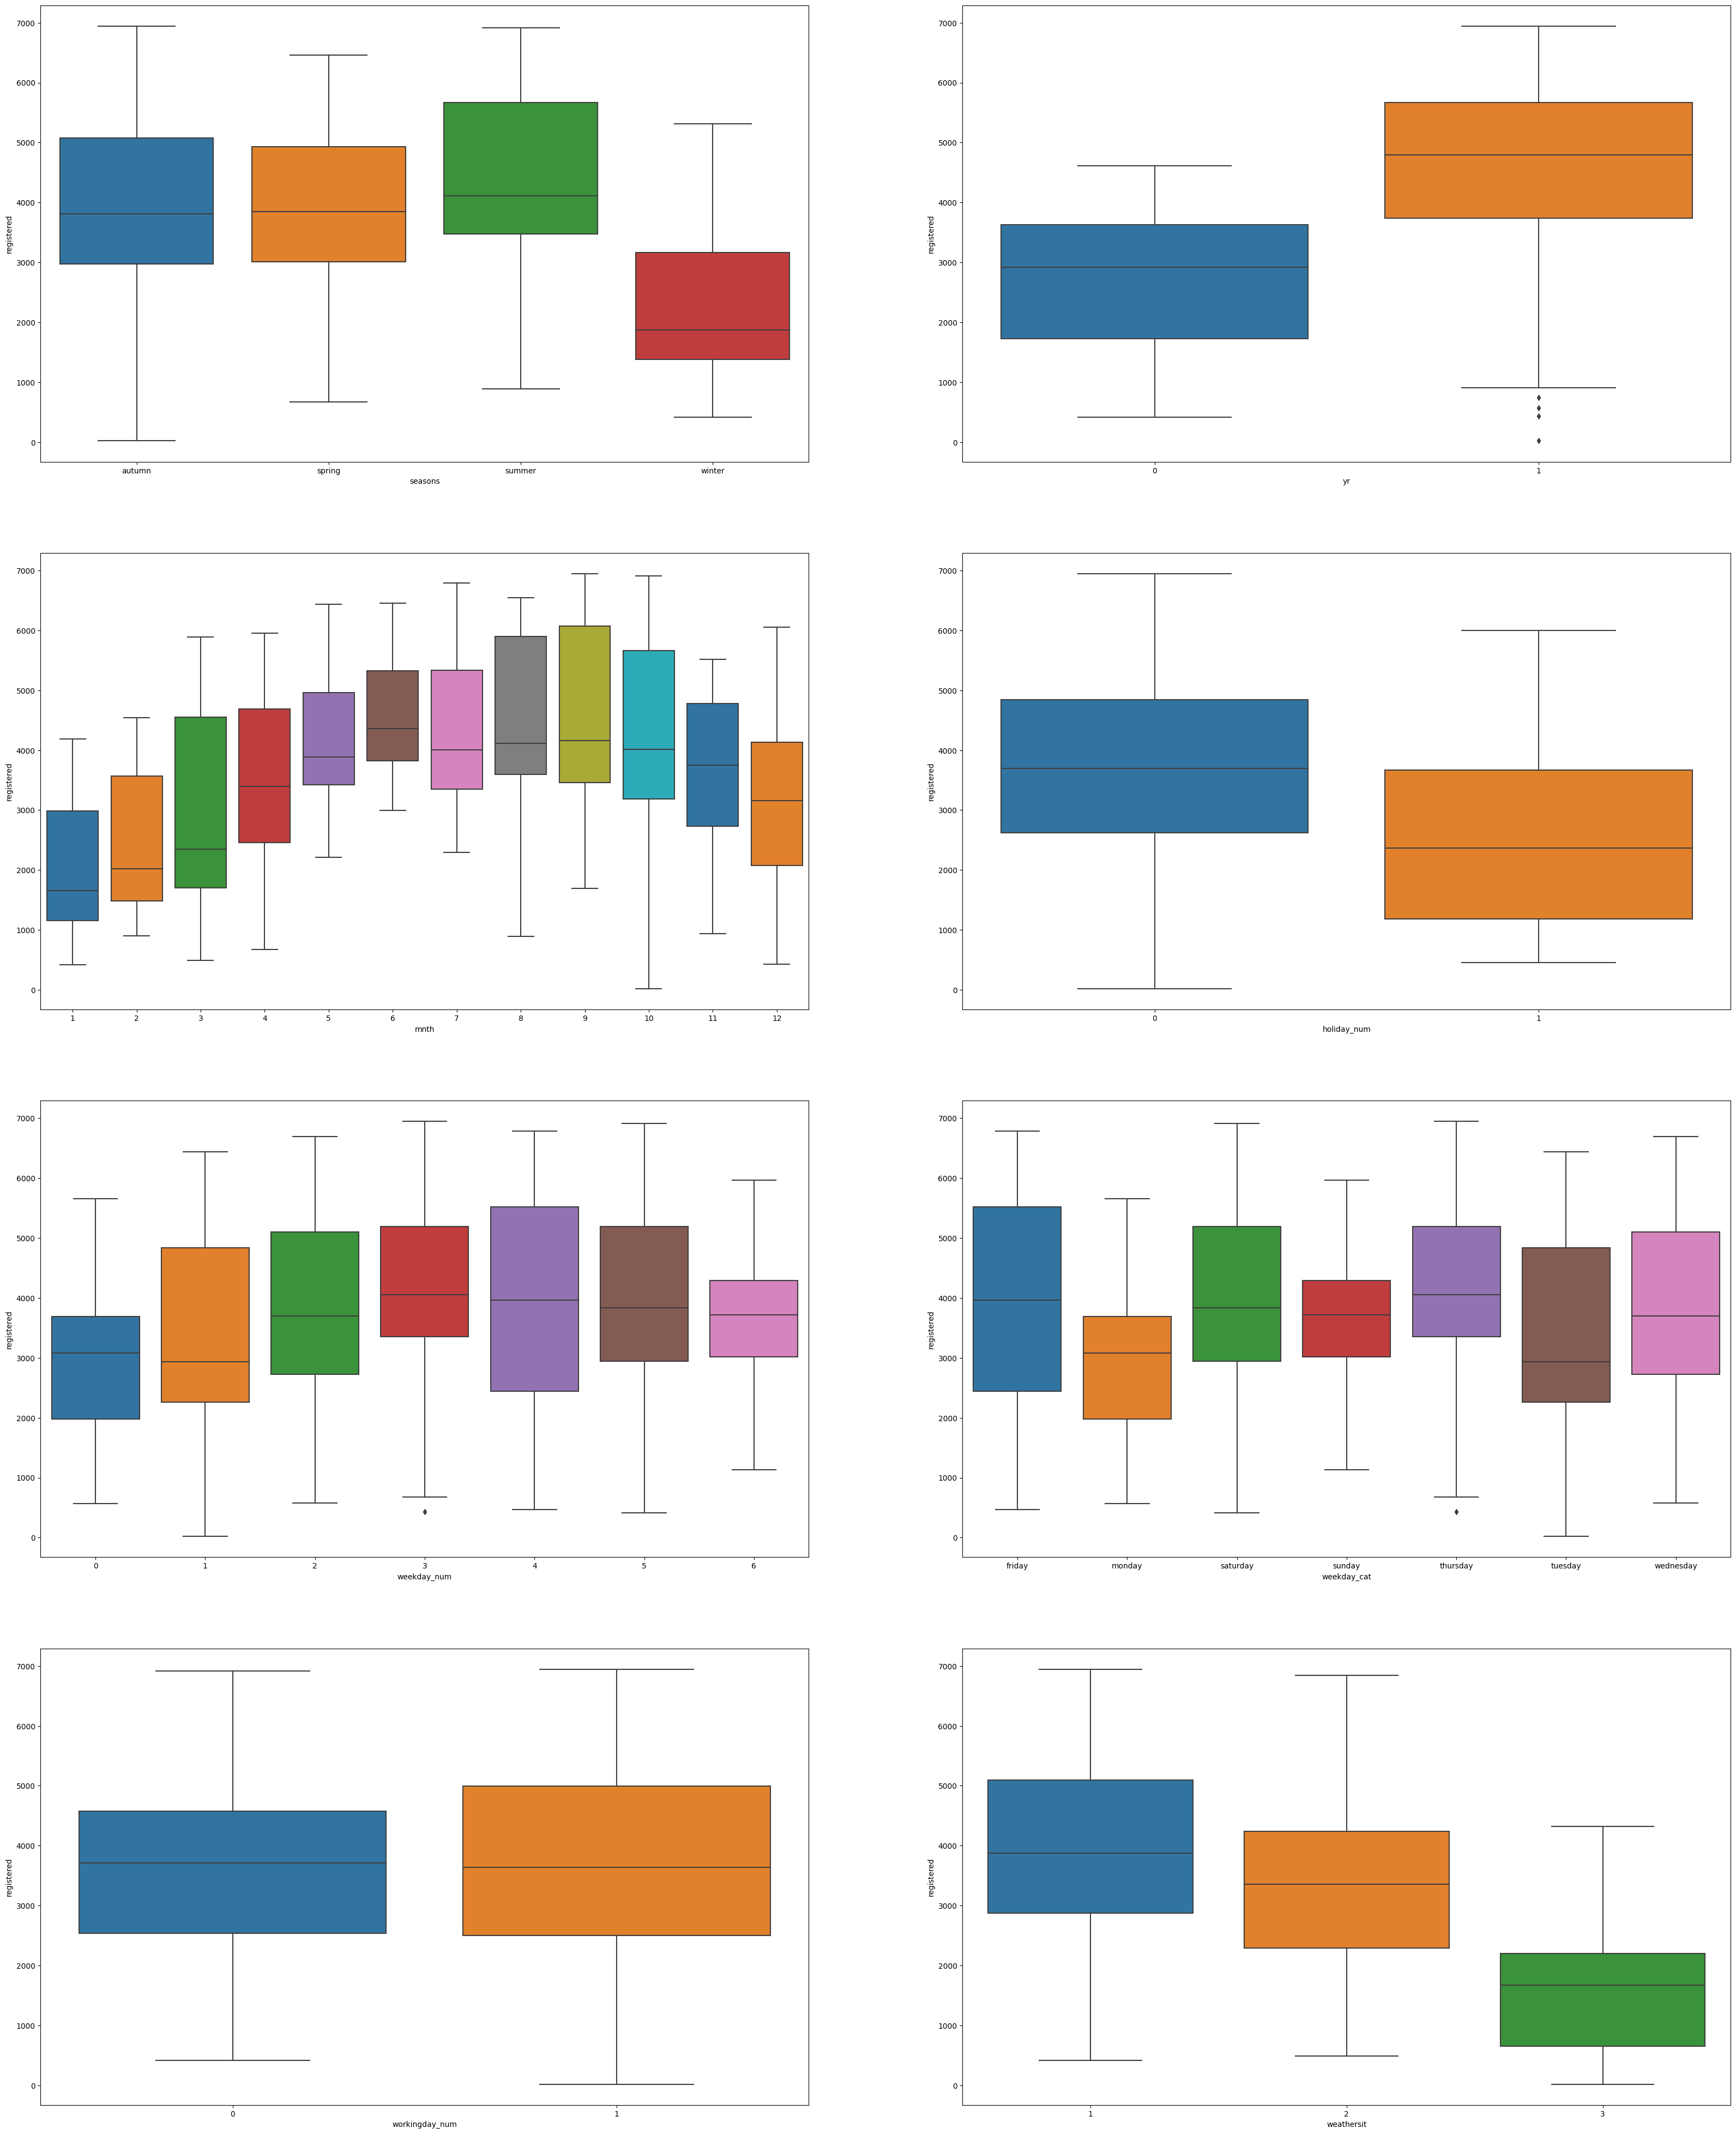

In [83]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (40, 50))

axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat):
    sns.boxplot(
    x       = colum,
    y       = 'registered',
    data    = df,
    palette = 'tab10',
    ax      = axes[i])

## Homogeneidad de varianzas

| Test Levene  |  Resultado | Conclusión   |
|---|---|---|
|  p-value > 0.05 | No significativo   | Cumple asunción, tienen varianzas similares|
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares |

``VR Casual``

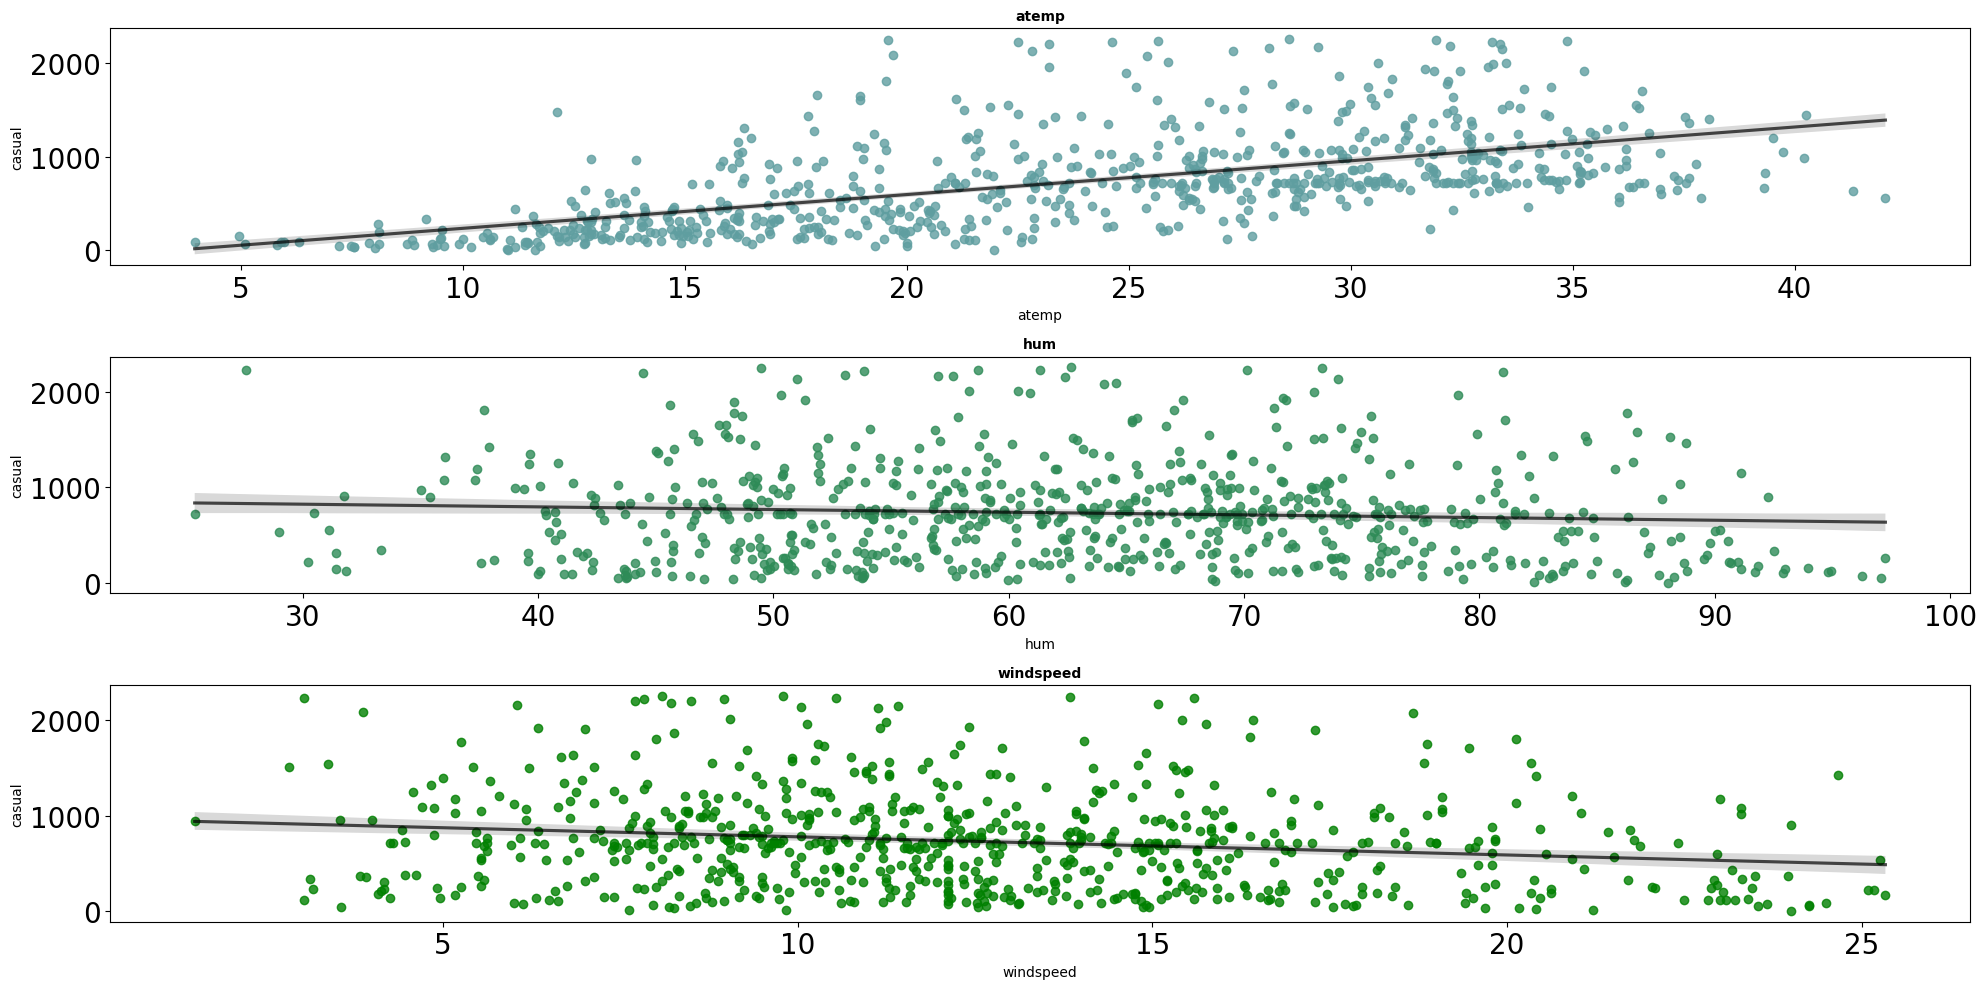

In [84]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["cadetblue", "seagreen", "green"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop(['casual', "registered"], axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'casual',
        color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel(colum)


fig.tight_layout();

In [85]:
#almacenamos en una lista para consultarlo cuando queramos:
homo_cas = []
hetero_cas = []

numericas=df.select_dtypes(include=np.number)
numericas.drop(["casual", "registered"], axis=1, inplace=True)

for col in numericas:
    print(f'para la columna {col.upper()}:')
    #print(stats.levene(df['casual'], df[col], center='median', proportiontocut=0.05))
    
    
    if (stats.levene(df['casual'], df[col], center='median', proportiontocut=0.05))[1] < 0.05:
        print(f'NO hay homogeneidad de varianzas para {col.upper()}, ya que p= {(stats.levene(df["casual"], df[col], center="median", proportiontocut=0.05))[1]}')
        print('------------------')
        homo_cas.append(col)

        
    else:
        print(f'Hay homogeneidad de varianzas para {col.upper()}, ya que p= {(stats.levene(df["casual"], df[col], center="median", proportiontocut=0.05))[1]}')
        print('------------------')
        hetero_cas.append(col)

para la columna ATEMP:
NO hay homogeneidad de varianzas para ATEMP, ya que p= 1.4960557943103384e-170
------------------
para la columna HUM:
NO hay homogeneidad de varianzas para HUM, ya que p= 1.9328616363497967e-167
------------------
para la columna WINDSPEED:
NO hay homogeneidad de varianzas para WINDSPEED, ya que p= 8.964684202007011e-173
------------------


``VR Registered``

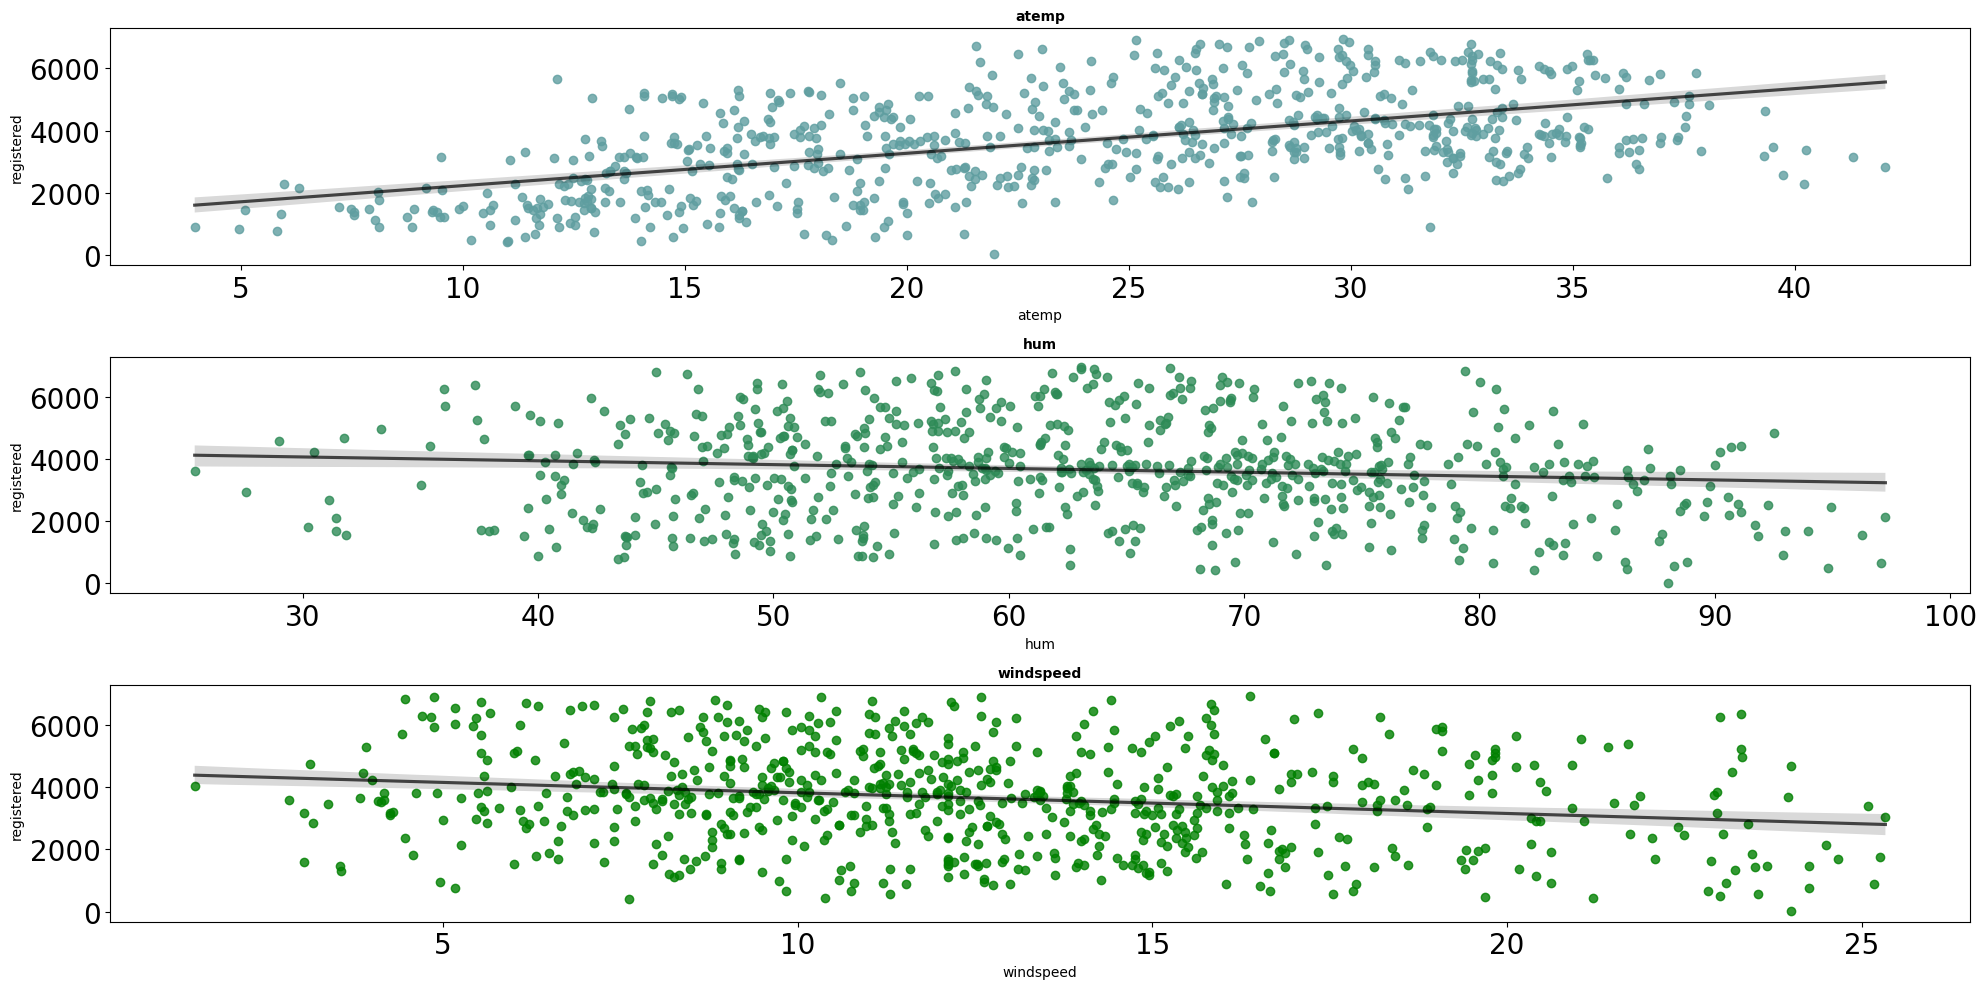

In [86]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["cadetblue", "seagreen", "green"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop(['casual', "registered"], axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'registered',
        color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel(colum)


fig.tight_layout();

In [87]:
#almacenamos en una lista para consultarlo cuando queramos:
homo_cas = []
hetero_cas = []

numericas=df.select_dtypes(include=np.number)
numericas.drop(["casual", "registered"], axis=1, inplace=True)

for col in numericas:
    print(f'para la columna {col.upper()}:')
    #print(stats.levene(df['casual'], df[col], center='median', proportiontocut=0.05))
    
    
    if (stats.levene(df['registered'], df[col], center='median', proportiontocut=0.05))[1] < 0.05:
        print(f'NO hay homogeneidad de varianzas para {col.upper()}, ya que p= {(stats.levene(df["casual"], df[col], center="median", proportiontocut=0.05))[1]}')
        print('------------------')
        homo_cas.append(col)

        
    else:
        print(f'Hay homogeneidad de varianzas para {col.upper()}, ya que p= {(stats.levene(df["casual"], df[col], center="median", proportiontocut=0.05))[1]}')
        print('------------------')
        hetero_cas.append(col)

para la columna ATEMP:
NO hay homogeneidad de varianzas para ATEMP, ya que p= 1.4960557943103384e-170
------------------
para la columna HUM:
NO hay homogeneidad de varianzas para HUM, ya que p= 1.9328616363497967e-167
------------------
para la columna WINDSPEED:
NO hay homogeneidad de varianzas para WINDSPEED, ya que p= 8.964684202007011e-173
------------------


# Normalización

``VR Casual``: Se utiliza el método logarítmico debido a su distribución


In [88]:
df["casual_log"]= df["casual"].apply(lambda x:np.log(x if x>0 else 0))

In [89]:
stats.shapiro(df["casual_log"])

ShapiroResult(statistic=0.9174023270606995, pvalue=1.5938523170629478e-19)

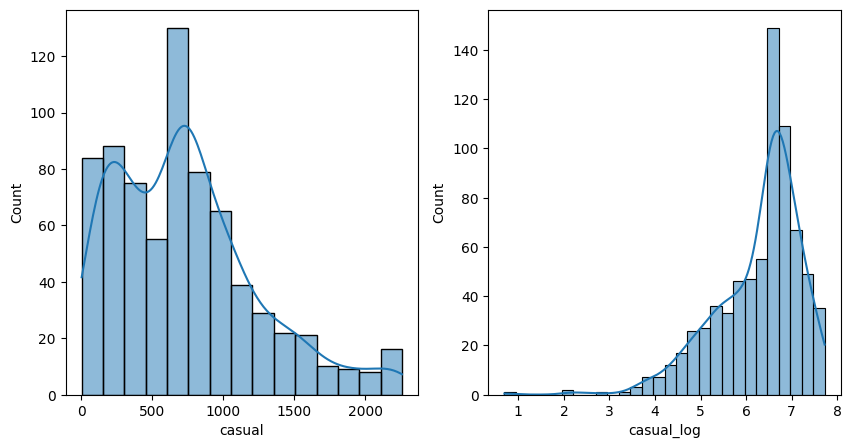

In [90]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes= axes.flat

sns.histplot(data = df, x = "casual", kde = True , ax = axes[0]);
sns.histplot(data = df, x = "casual_log",  kde = True, ax = axes[1]);

- No se ha normalizado la variable casual

``VR Registered``: Se utiliza el método de raíz cuadrada debido a su distribución

In [91]:
df["registered_log"]= df["registered"].apply(lambda x:math.sqrt(x))

In [92]:
stats.shapiro(df['registered_log'])

ShapiroResult(statistic=0.9734112620353699, pvalue=2.976442425861592e-10)

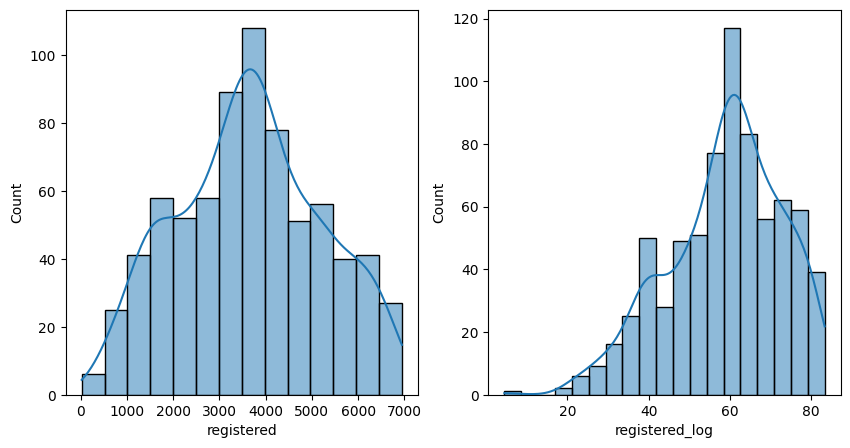

In [93]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes= axes.flat

sns.histplot(data = df, x = "registered", kde = True , ax = axes[0]);
sns.histplot(data = df, x = "registered_log",  kde = True, ax = axes[1]);

- No se ha normalizado la variable registered

# Conclusiones asunciones:

- Las variables respuesta casual y registered no tienen una distribución normal
- Las variables predictoras son independientes.
- Las variables predictoras somo heterocedastícas.

- No es posible aplicar el método de Regresión lineal, se aplicará Decision Tree y Random Forest, para identificar qué modelo arroja mejores resultados.

In [94]:
df.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,atemp,hum,windspeed,casual,registered,casual_log,registered_log
instant,,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2,18.18125,80.5833,10.749882,331,654,5.802118,25.573424
2,2018-01-02,winter,0,1,0,1,tuesday,1,2,17.68695,69.6087,16.652113,131,670,4.875197,25.884358


In [95]:
df.drop(["casual_log" , "registered_log"], axis=1, inplace=True)

In [96]:
df.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,atemp,hum,windspeed,casual,registered
instant,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2,18.18125,80.5833,10.749882,331,654
2,2018-01-02,winter,0,1,0,1,tuesday,1,2,17.68695,69.6087,16.652113,131,670


# Guardamos el dataset sin outliers y analizado

In [97]:
df.to_csv("datos/1.bikes_limpio.csv")

In [98]:
df.to_pickle("datos/1.bikes_limpio.pkl")